In [2]:
import numpy as np
import pandas as pd

**Read the file into a dataframe.**

In [3]:
water=pd.read_csv("/Users/manishabrahmachary/Anales/india_water.csv",encoding = "ISO-8859-1")

In [4]:
water.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,1/4/2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,1/4/2009


**Change two names of "Chattisgarh' to one single name.**

In [30]:
waternew=water.replace(['CHHATTISGARH'], ['CHATTISGARH'])

In [6]:
waternew['State Name'].unique()

array(['ANDHRA PRADESH', 'ASSAM', 'ARUNACHAL PRADESH', 'BIHAR', 'GUJARAT',
       'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'KARNATAKA',
       'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MEGHALAYA', 'NAGALAND',
       'ORISSA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL', 'CHATTISGARH',
       'JHARKHAND', 'UTTARAKHAND', 'MANIPUR'], dtype=object)

In [7]:
list(waternew.columns.values)

['State Name',
 'District Name',
 'Block Name',
 'Panchayat Name',
 'Village Name',
 'Habitation Name',
 'Quality Parameter',
 'Year']

In [8]:
waternew['Quality Parameter'].unique()

array(['Salinity', 'Fluoride', 'Iron', 'Arsenic', 'Nitrate'], dtype=object)

**Drawing a factorplot to show how the amount of "Quality Parameters" are changing over the years. It should be noted that the amounts have decreased over the years i.e the purity of water has increased.We notice that 'iron' is still very high though there is a trend towards a decline. Fluoride and salinity are also significant but the amounts have declined.**

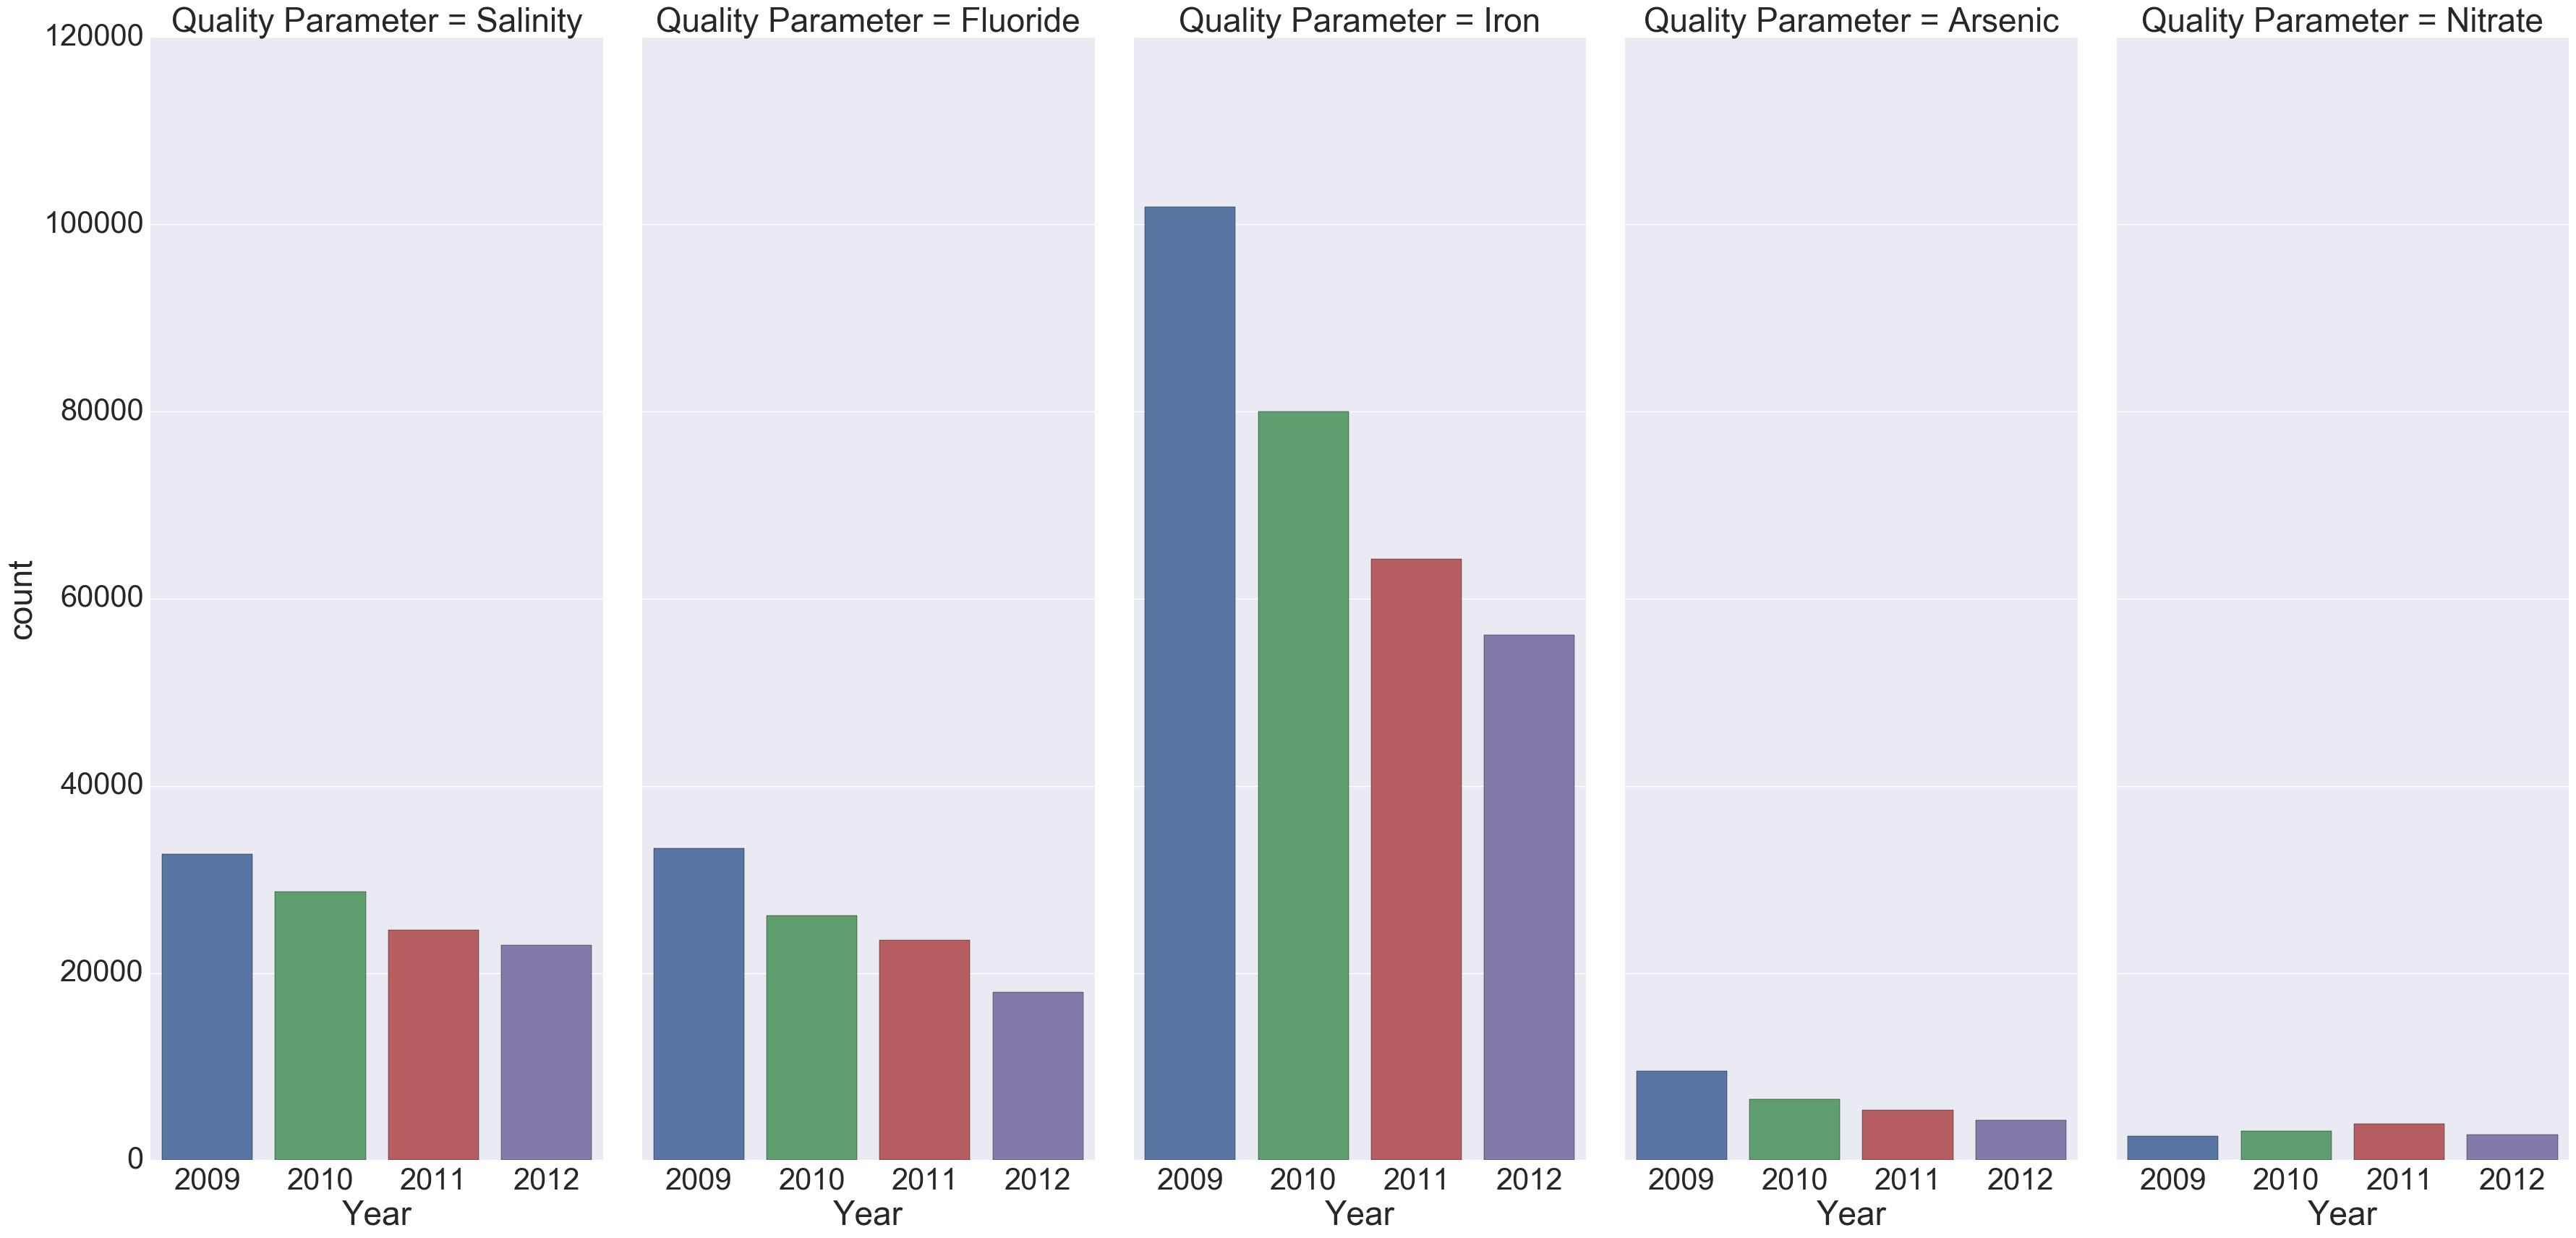

In [115]:

g6=sns.factorplot('Year', col='Quality Parameter', kind='count', data=waternew, size=18,aspect=.4, col_wrap=5)
g.set_xticklabels(rotation=90)

In [116]:
quality_count=waternew.groupby(['Year', 'Quality Parameter']).size()

In [117]:
quality_par_count=pd.DataFrame(data=dict(quallity_count=quality_count)).reset_index()



In [118]:
quality_par_count

,Year,Quality Parameter,quallity_count
0,2009,Arsenic,9504
1,2009,Fluoride,33363
2,2009,Iron,101872
3,2009,Nitrate,2571
4,2009,Salinity,32689
5,2010,Arsenic,6548
6,2010,Fluoride,26180
7,2010,Iron,80015
8,2010,Nitrate,3133
9,2010,Salinity,28706


**From the above graph it is pretty clear thst the water quality has been increasing from 2009-2012.**

**Now let us explore the quality parameter for the states.**

In [9]:
state_water_count=waternew.groupby(['Quality Parameter', 'State Name']).size()

**groupby quality parameter and state name and she what is the count of different chemicals in the states. We notice that its either bihar or West Bengal or rajasthan which have the largest proportions in each case. So we explore more the data for these states.**

In [10]:
state_water_count

Quality Parameter  State Name       
Arsenic            ASSAM                 4775
                   BIHAR                 6215
                   CHATTISGARH             12
                   HIMACHAL PRADESH         8
                   JHARKHAND               28
                   KARNATAKA              116
                   MAHARASHTRA              1
                   ORISSA                   2
                   RAJASTHAN               87
                   UTTAR PRADESH         2069
                   UTTARAKHAND             10
                   WEST BENGAL          12382
Fluoride           ANDHRA PRADESH        2193
                   ASSAM                 1037
                   BIHAR                16150
                   CHATTISGARH            570
                   GUJARAT                804
                   HARYANA                244
                   JAMMU AND KASHMIR        4
                   JHARKHAND              626
                   KARNATAKA            131

In [11]:
statewater=pd.DataFrame(data=dict(state_water_count=state_water_count)).reset_index()


**Split up the data statewater by quality parameters.**

In [12]:
state_nitrate=statewater[statewater['Quality Parameter']=='Nitrate']
state_arsenic=statewater[statewater['Quality Parameter']=='Arsenic']
state_fluoride=statewater[statewater['Quality Parameter']=='Fluoride']
state_salinity=statewater[statewater['Quality Parameter']=='Salinity']
state_iron=statewater[statewater['Quality Parameter']=='Iron']

In [13]:
state_fluoride

,Quality Parameter,State Name,state_water_count
12,Fluoride,ANDHRA PRADESH,2193
13,Fluoride,ASSAM,1037
14,Fluoride,BIHAR,16150
15,Fluoride,CHATTISGARH,570
16,Fluoride,GUJARAT,804
17,Fluoride,HARYANA,244
18,Fluoride,JAMMU AND KASHMIR,4
19,Fluoride,JHARKHAND,626
20,Fluoride,KARNATAKA,13156
21,Fluoride,KERALA,496


In [14]:
statewater['State Name'].unique()

array(['ASSAM', 'BIHAR', 'CHATTISGARH', 'HIMACHAL PRADESH', 'JHARKHAND',
       'KARNATAKA', 'MAHARASHTRA', 'ORISSA', 'RAJASTHAN', 'UTTAR PRADESH',
       'UTTARAKHAND', 'WEST BENGAL', 'ANDHRA PRADESH', 'GUJARAT',
       'HARYANA', 'JAMMU AND KASHMIR', 'KERALA', 'MADHYA PRADESH',
       'MEGHALAYA', 'PUNJAB', 'TAMIL NADU', 'ARUNACHAL PRADESH', 'MANIPUR',
       'NAGALAND', 'PUDUCHERRY', 'TRIPURA'], dtype=object)

** The below graphs give visualizations of the point explained before, i.e how the total 'Quality Parameters" compare in different states.**

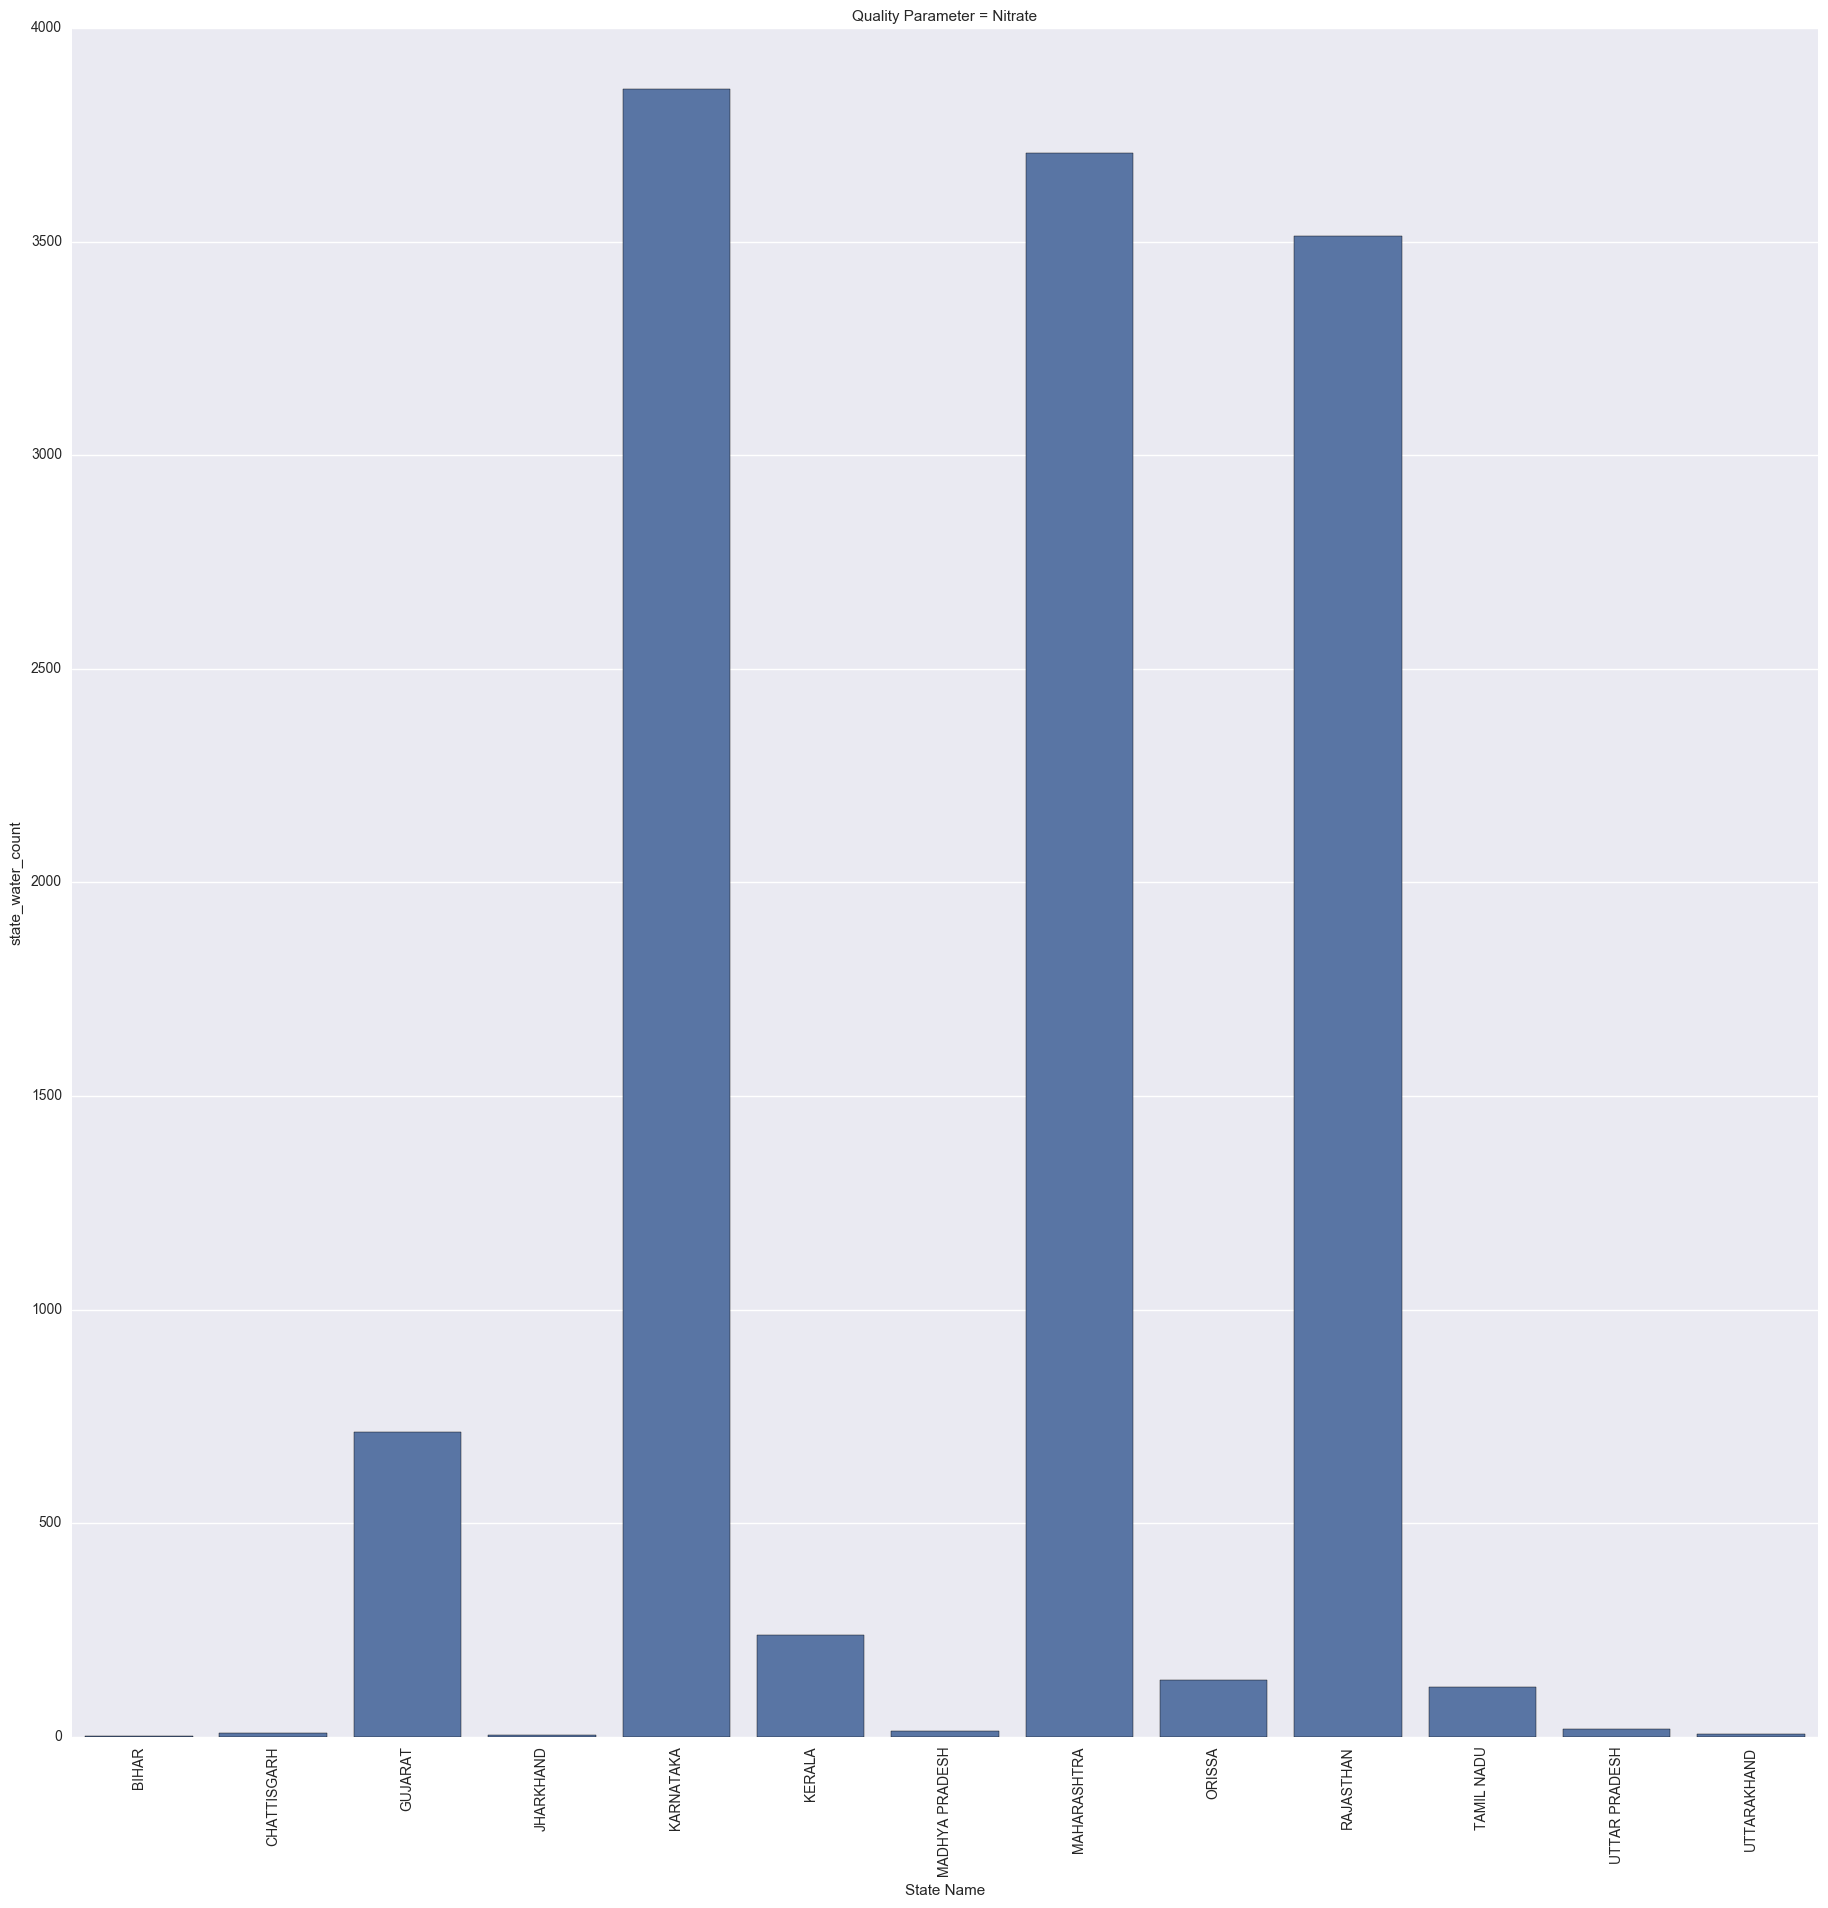

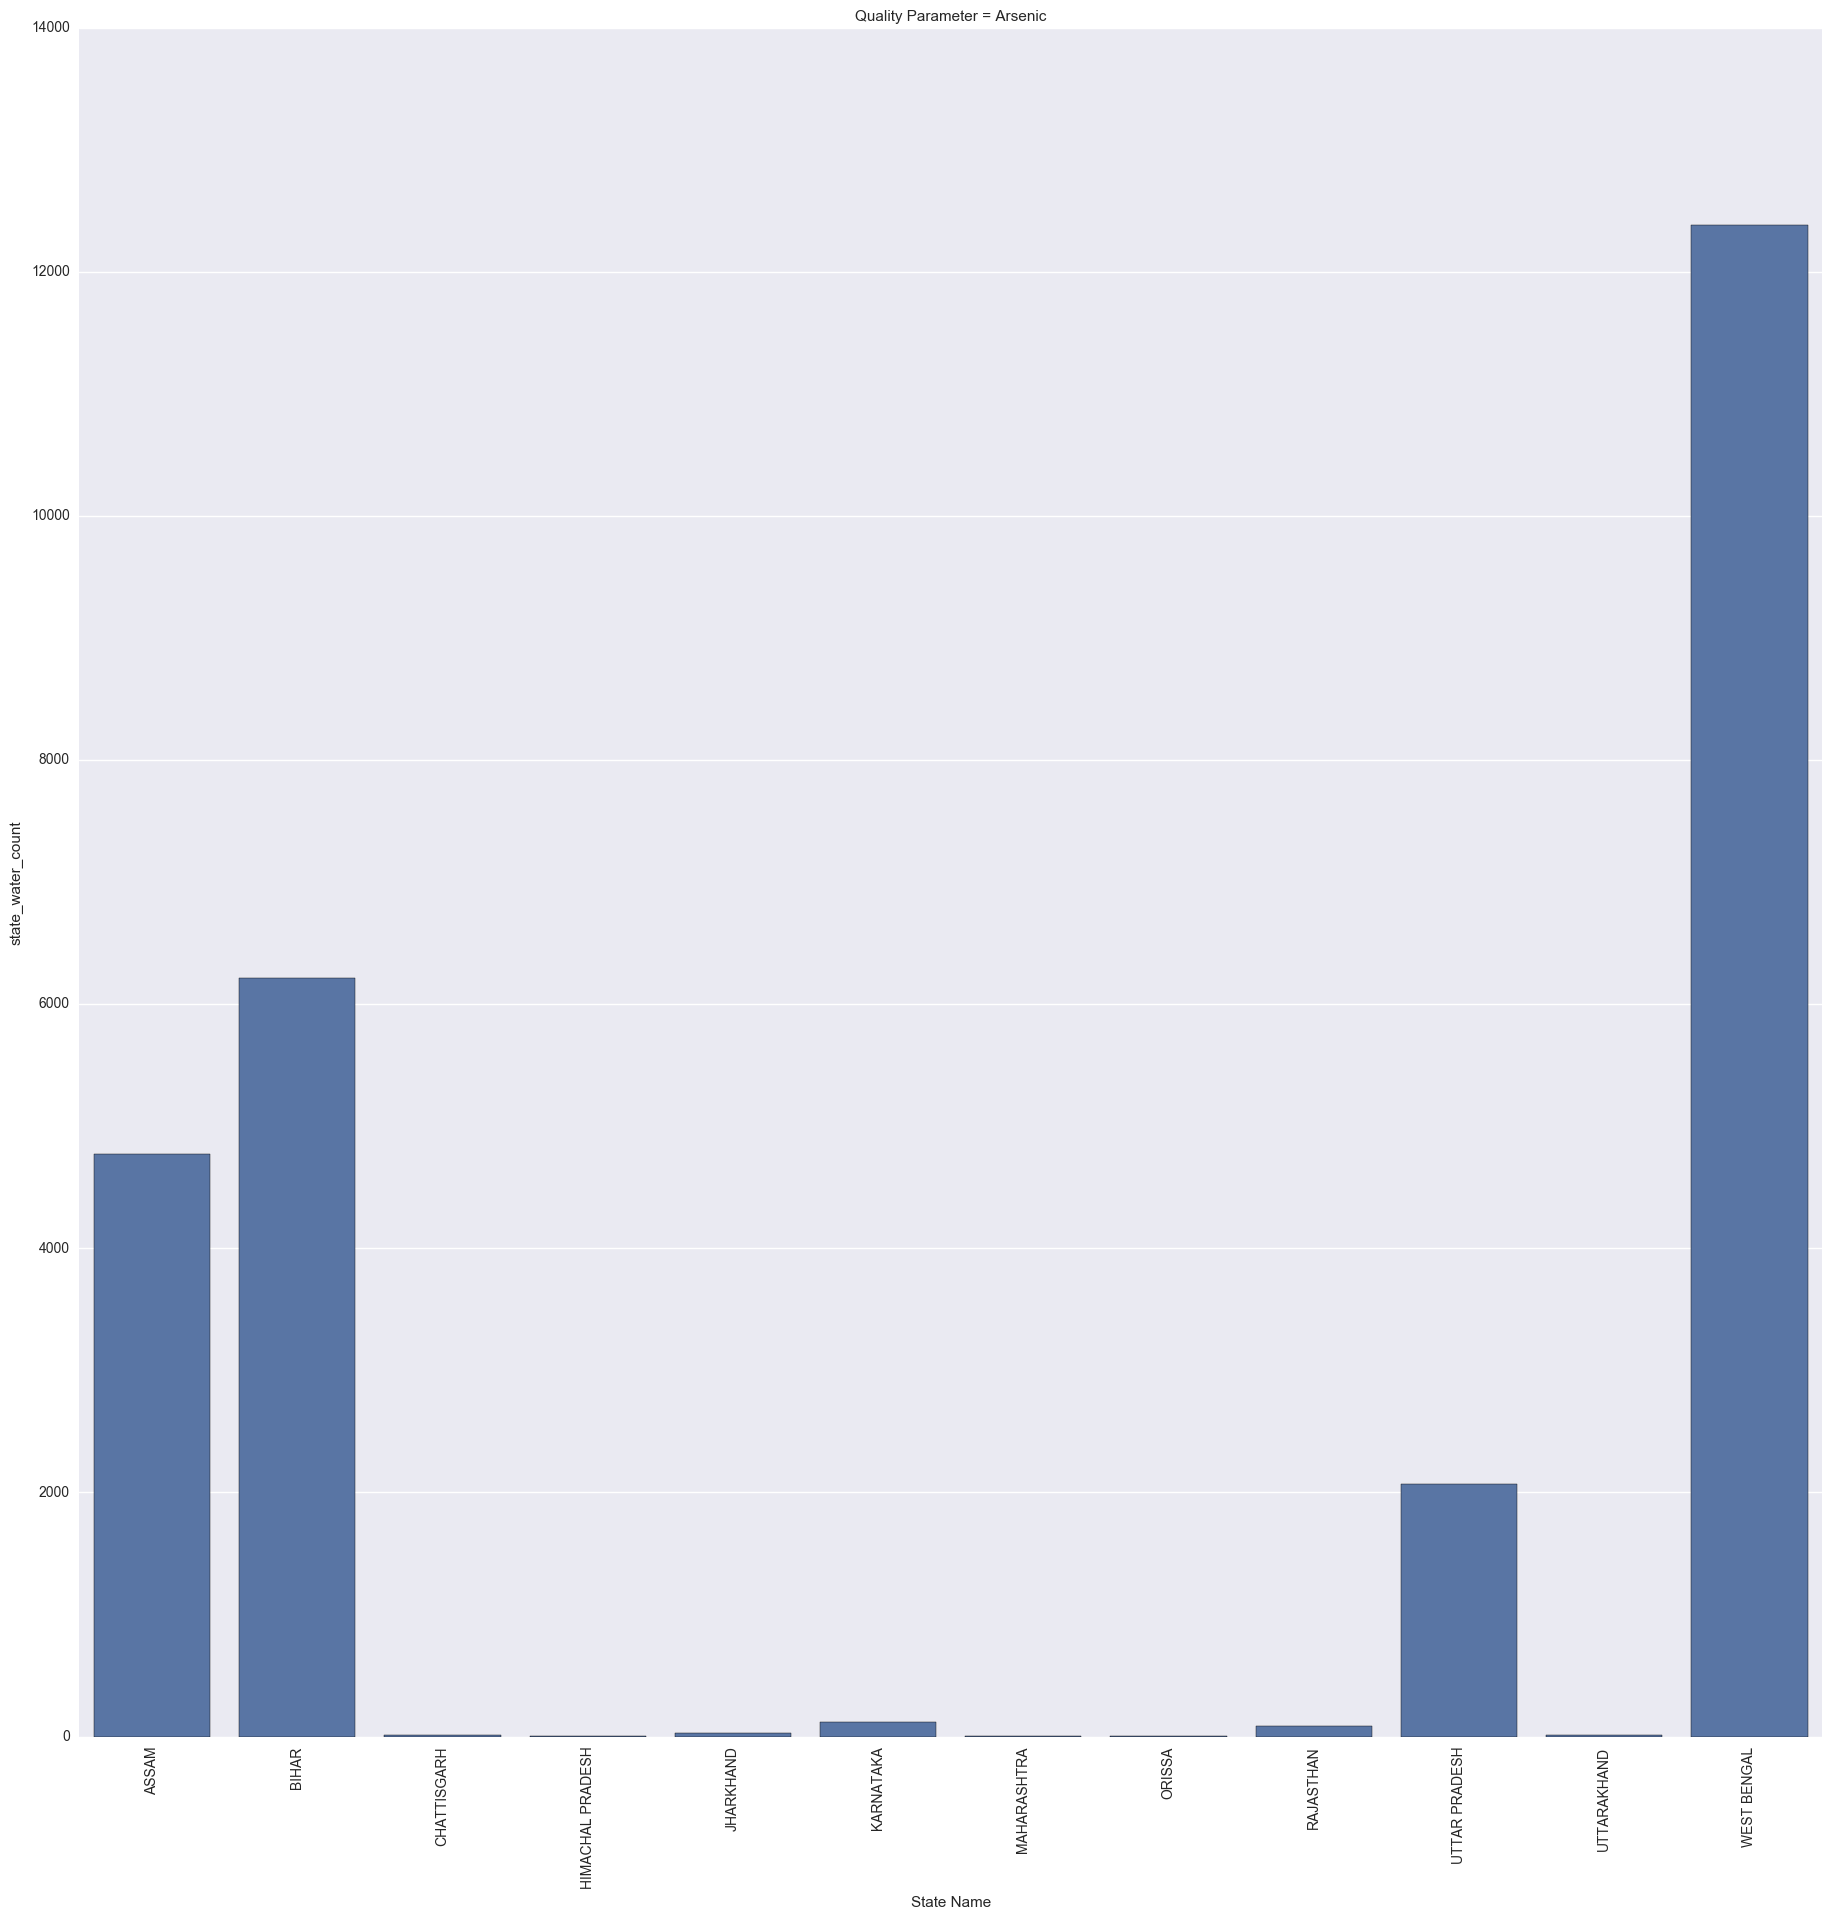

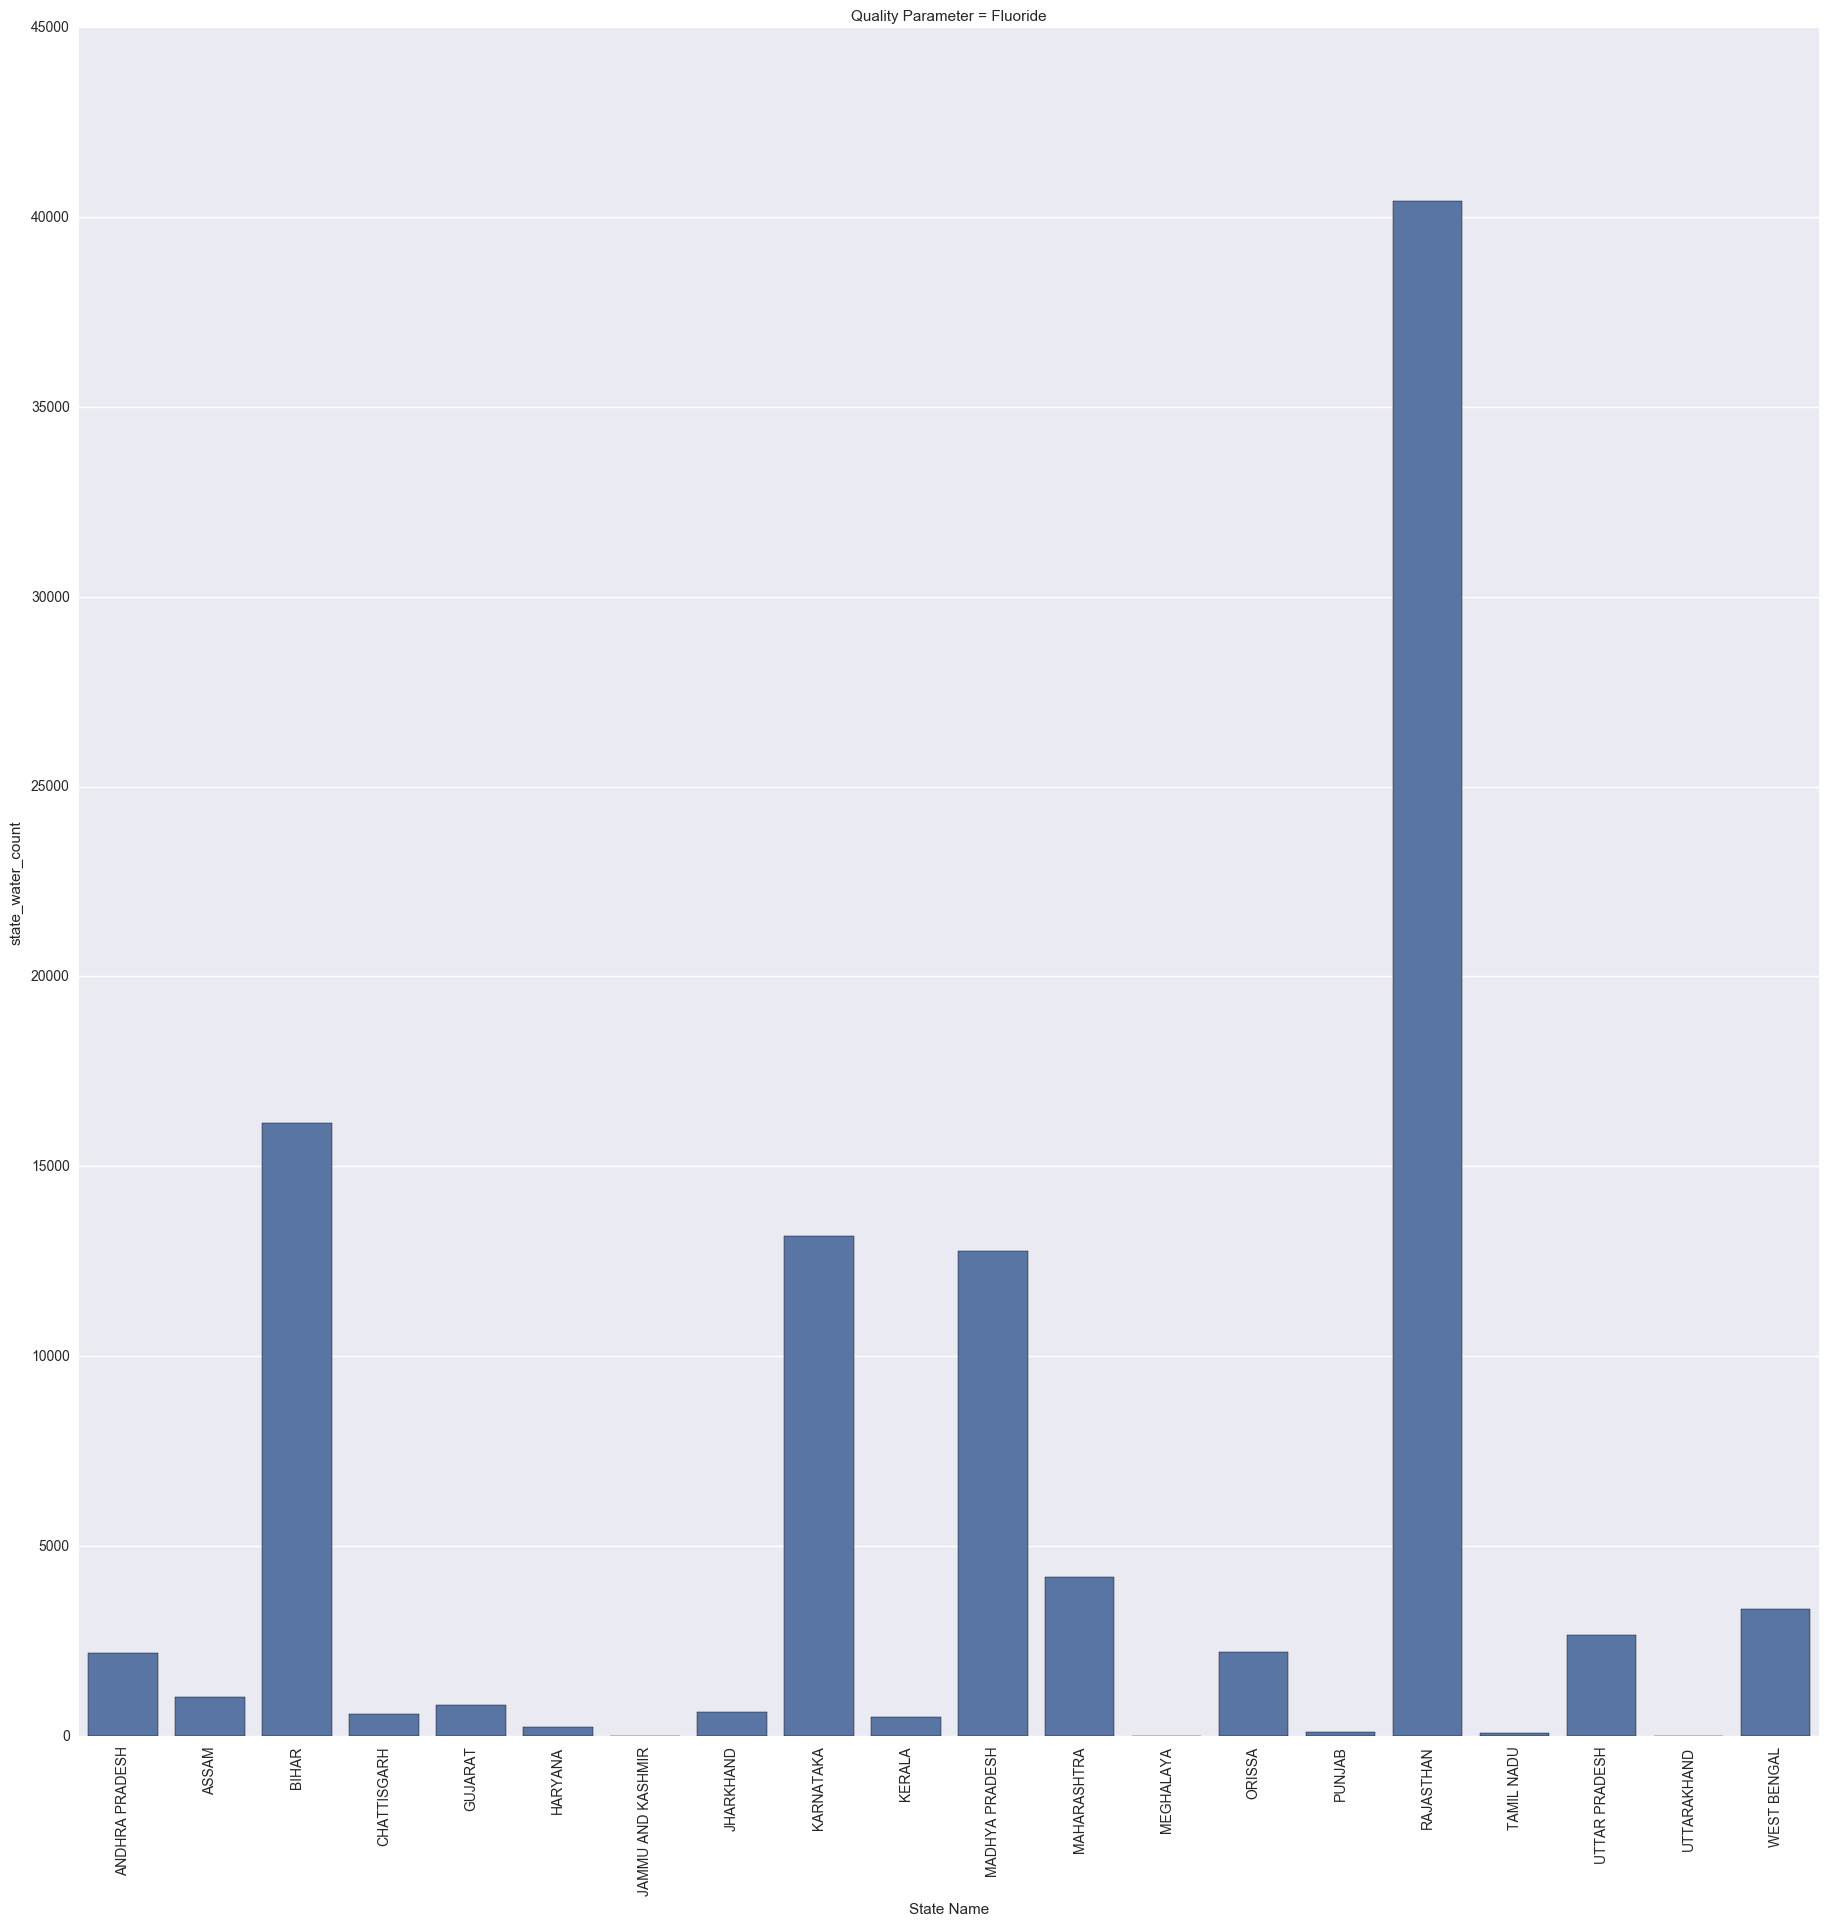

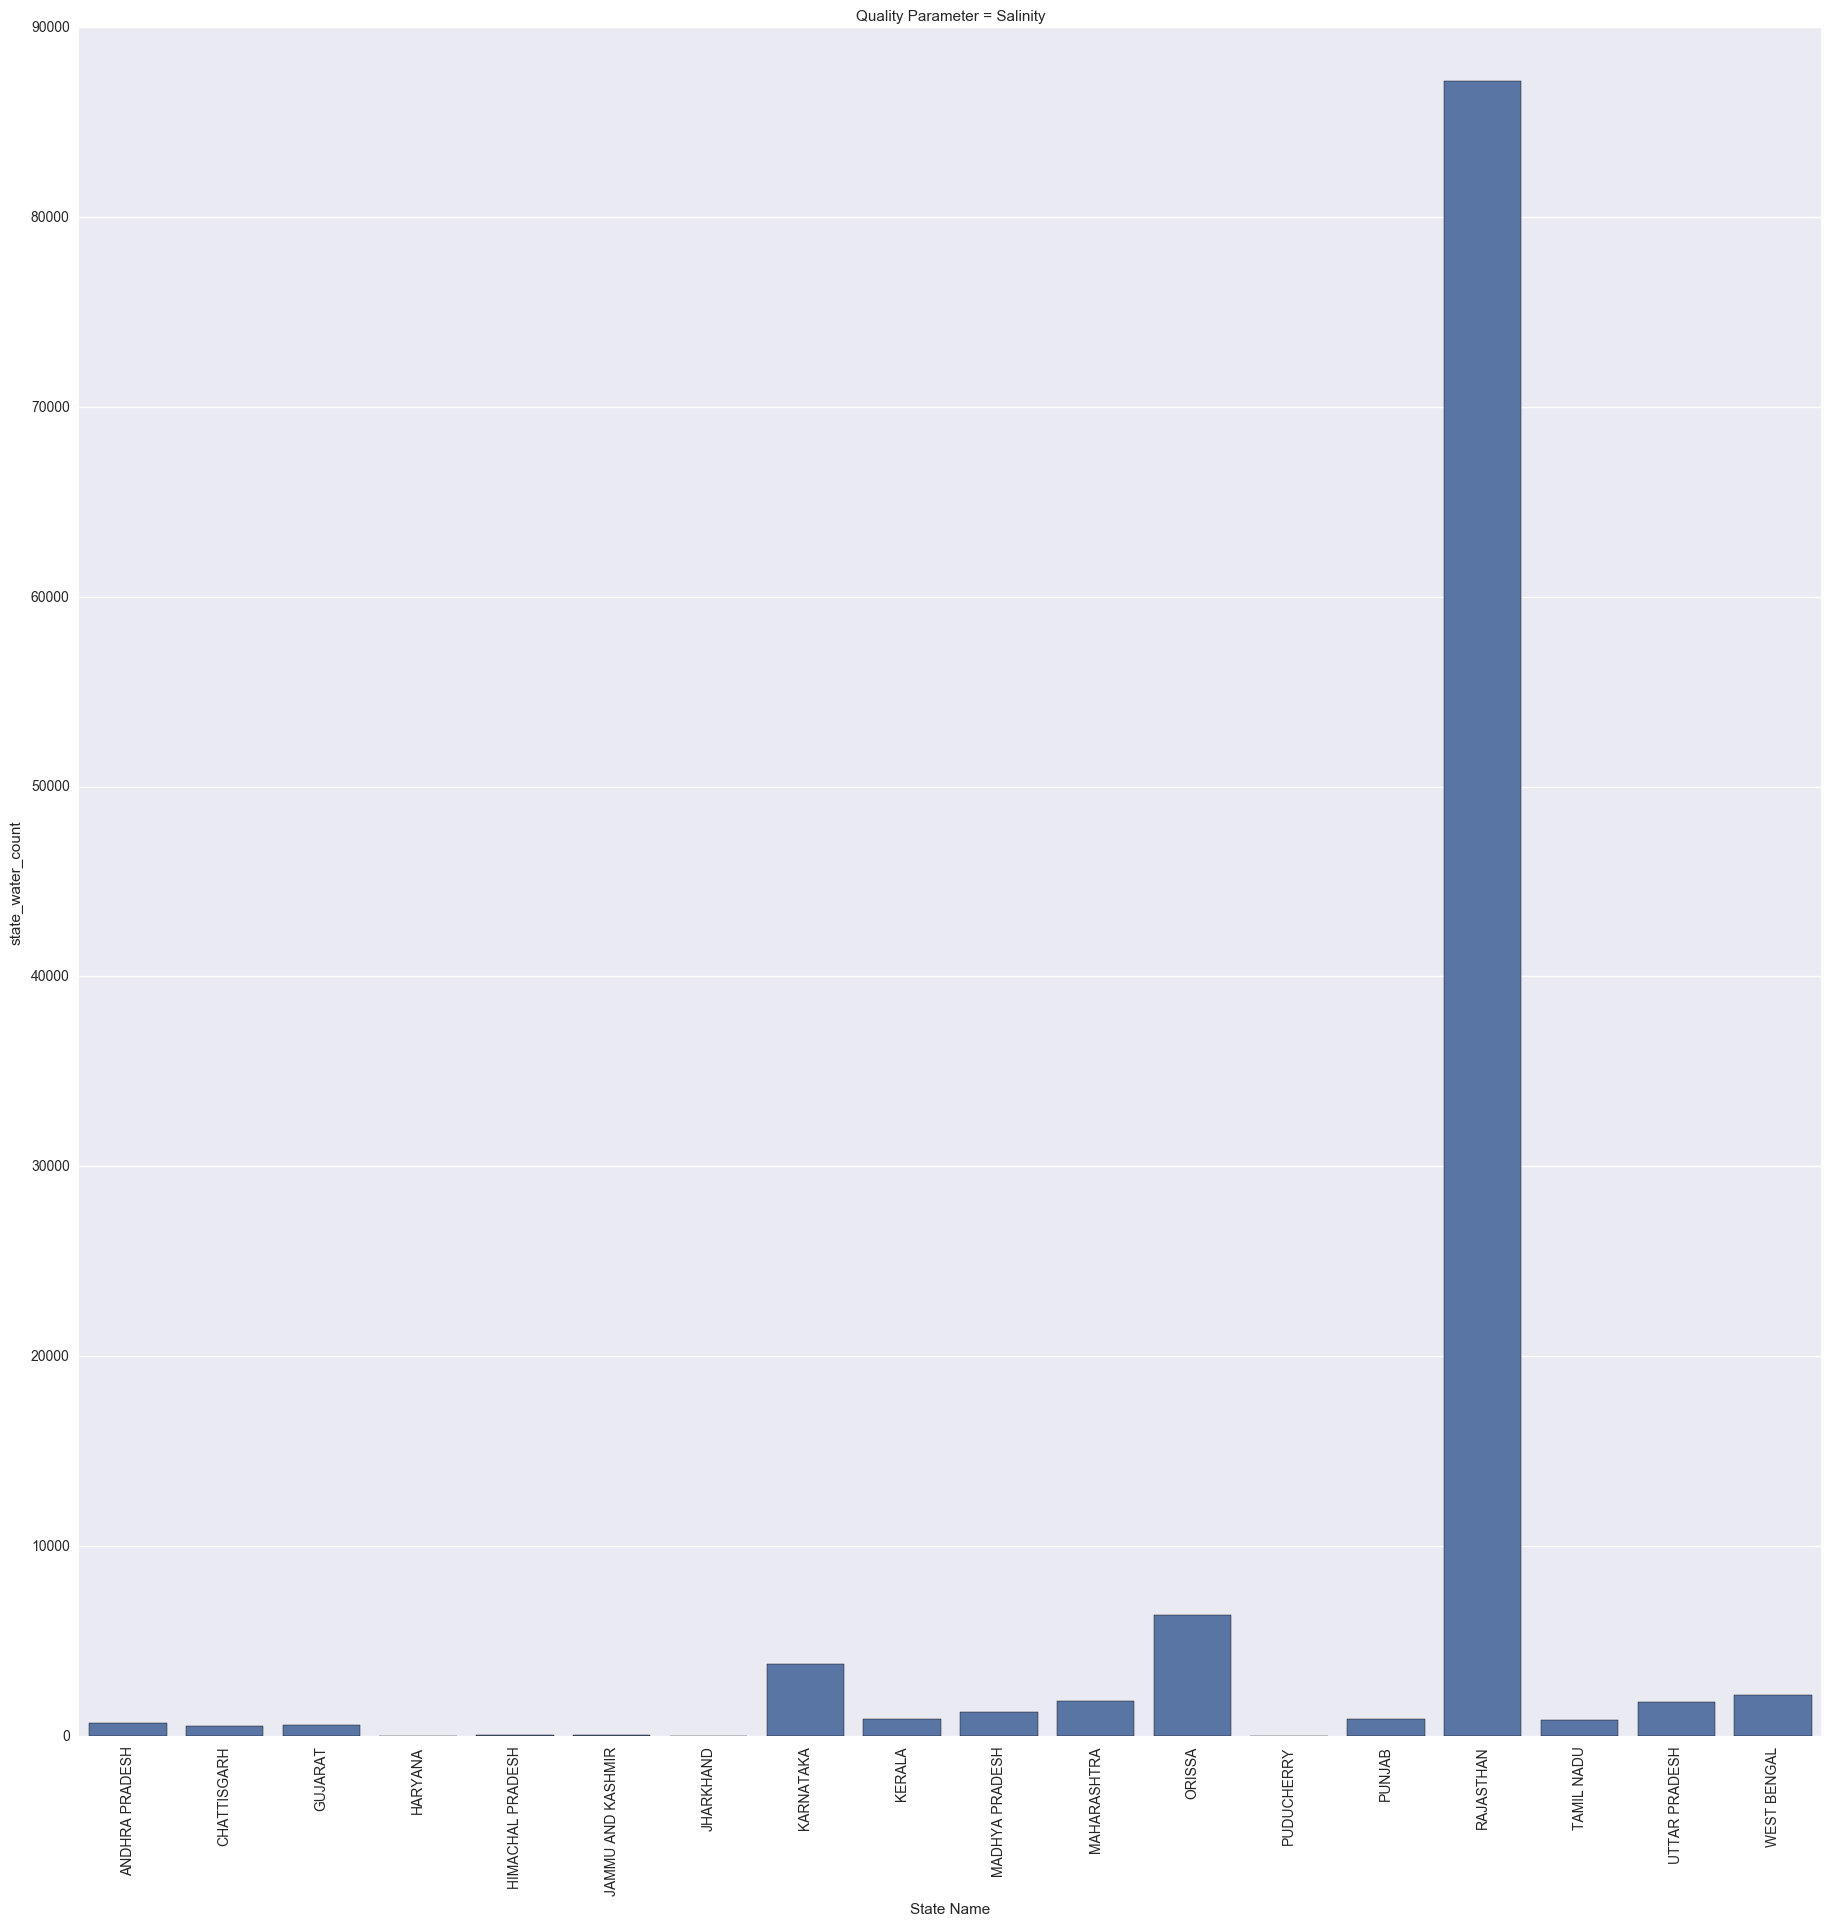

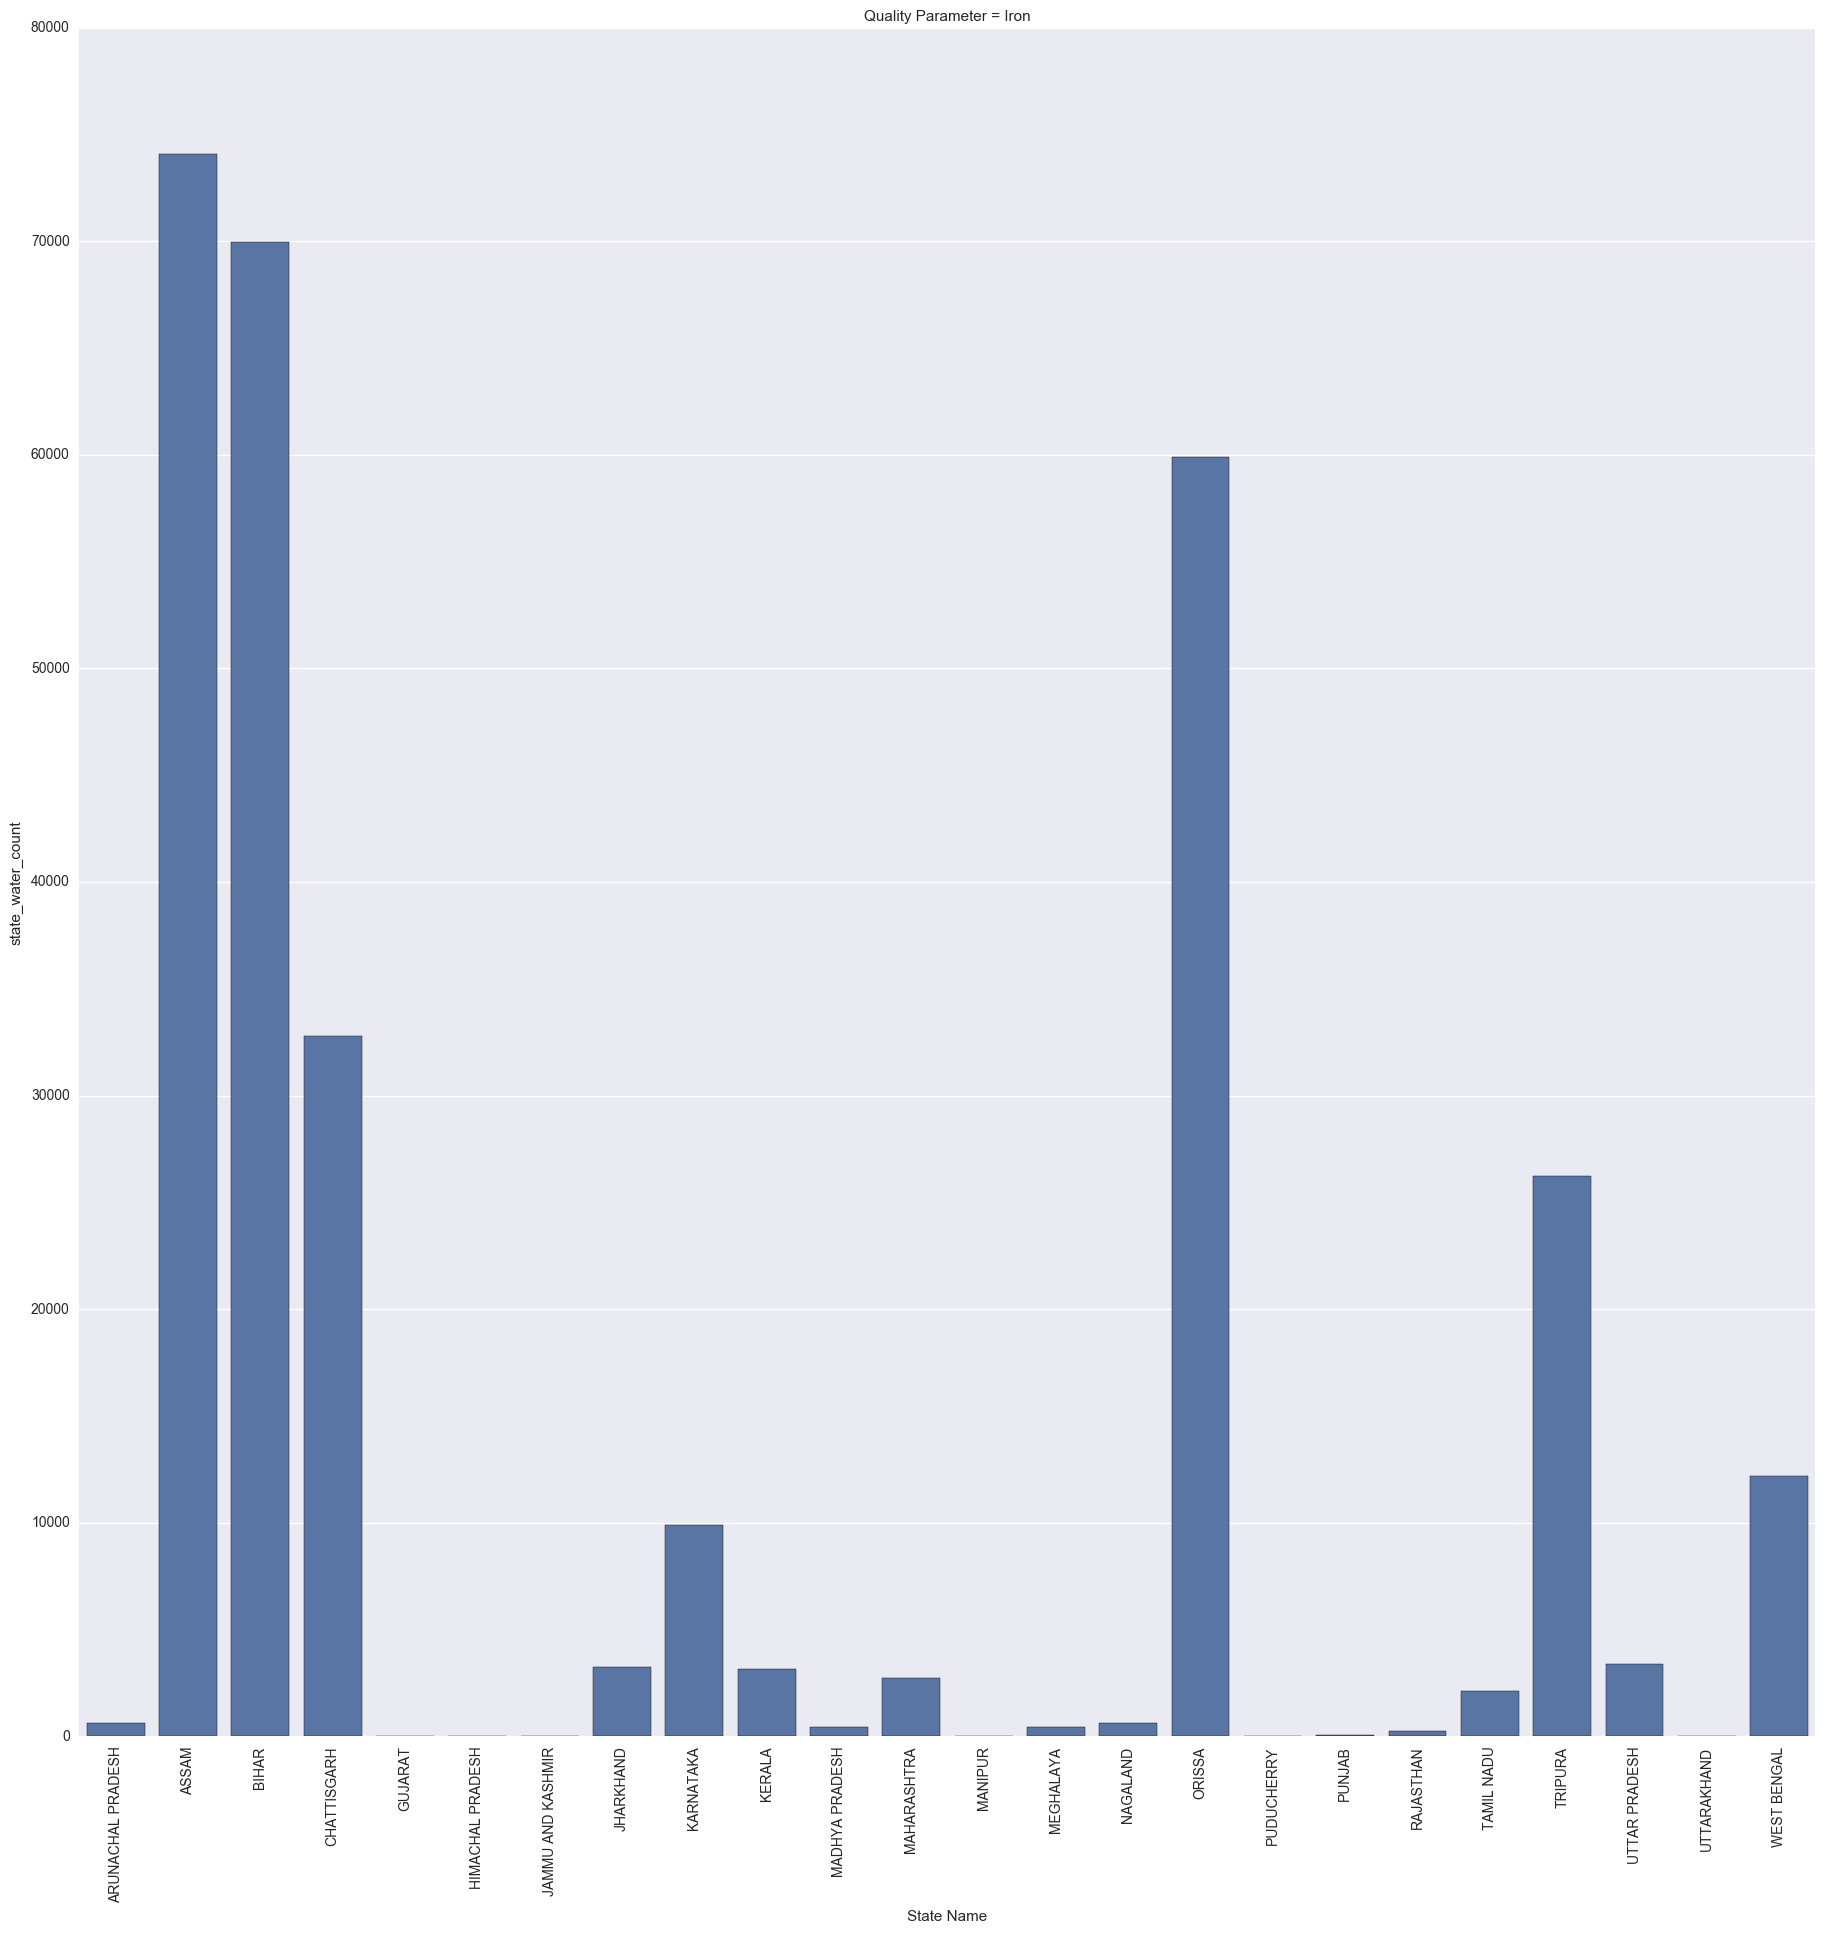

In [51]:
%matplotlib inline
import seaborn as sns
g = sns.FacetGrid(state_nitrate, col="Quality Parameter",size=18, aspect=1, col_wrap=2)
g.map(sns.barplot,'State Name','state_water_count')
g.set_xticklabels(rotation=90)
g1 = sns.FacetGrid(state_arsenic, col="Quality Parameter",size=18, aspect=1, col_wrap=2)
g1.map(sns.barplot,'State Name','state_water_count')
g1.set_xticklabels(rotation=90)
g2 = sns.FacetGrid(state_fluoride, col="Quality Parameter",size=18, aspect=1, col_wrap=2)
g2.map(sns.barplot,'State Name','state_water_count')
g2.set_xticklabels(rotation=90)
g3 = sns.FacetGrid(state_salinity, col="Quality Parameter",size=18, aspect=1, col_wrap=2)
g3.map(sns.barplot,'State Name','state_water_count')
g3.set_xticklabels(rotation=90)
g4 = sns.FacetGrid(state_iron, col="Quality Parameter",size=18, aspect=1, col_wrap=2)
g4.map(sns.barplot,'State Name','state_water_count')
g4.set_xticklabels(rotation=90)



**The above graphs explain for which state over the years from 2009-2012 has water chemicals are highest.** 

In [16]:
waternew['Year'].unique()

array(['1/4/2009', '1/4/2010', '1/4/2011', '1/4/2012'], dtype=object)

In [40]:
Year=[s[4:] for s in waternew.Year]

In [18]:
type(waternew['Year'])

pandas.core.series.Series

In [41]:
waternew['Year']=Year

**Just changing the dates to keep only the years.**

In [42]:
waternew['Year'].unique()

array(['2009', '2010', '2011', '2012'], dtype=object)

In [43]:
waternew['Year']=waternew['Year'].astype(int)

In [22]:
waternew_2009=waternew[waternew['Year']==2009]
waternew_2010=waternew[waternew['Year']==2010]
waternew_2011=waternew[waternew['Year']==2011]
waternew_2012=waternew[waternew['Year']==2012]

In [23]:
waternew_2009.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,2009


**The plots below give a comparison of 'Quality Parameters' in different states in 2009.The subsequent ones are for 2010,2011 and 2012.**

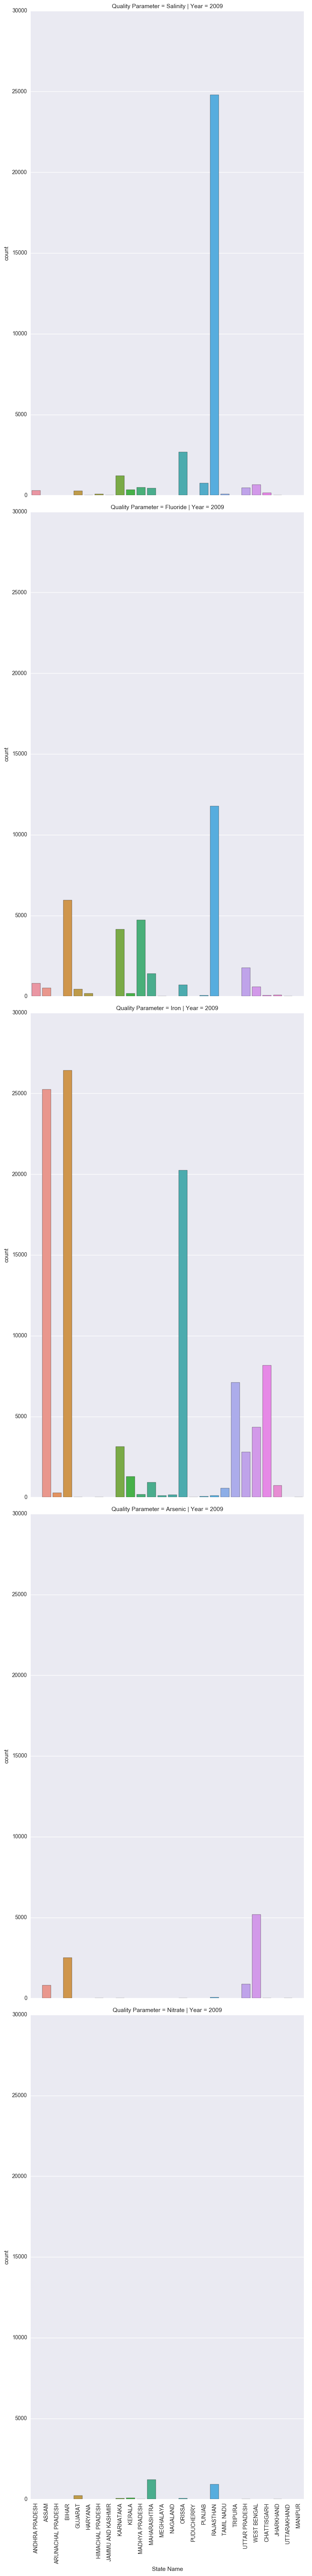

In [24]:
g = sns.factorplot("State Name", col="Year", row='Quality Parameter',
...                    data=waternew_2009,
...                    kind="count", size=13, aspect=.6)
g.set_xticklabels(rotation=90)
g.add_legend()

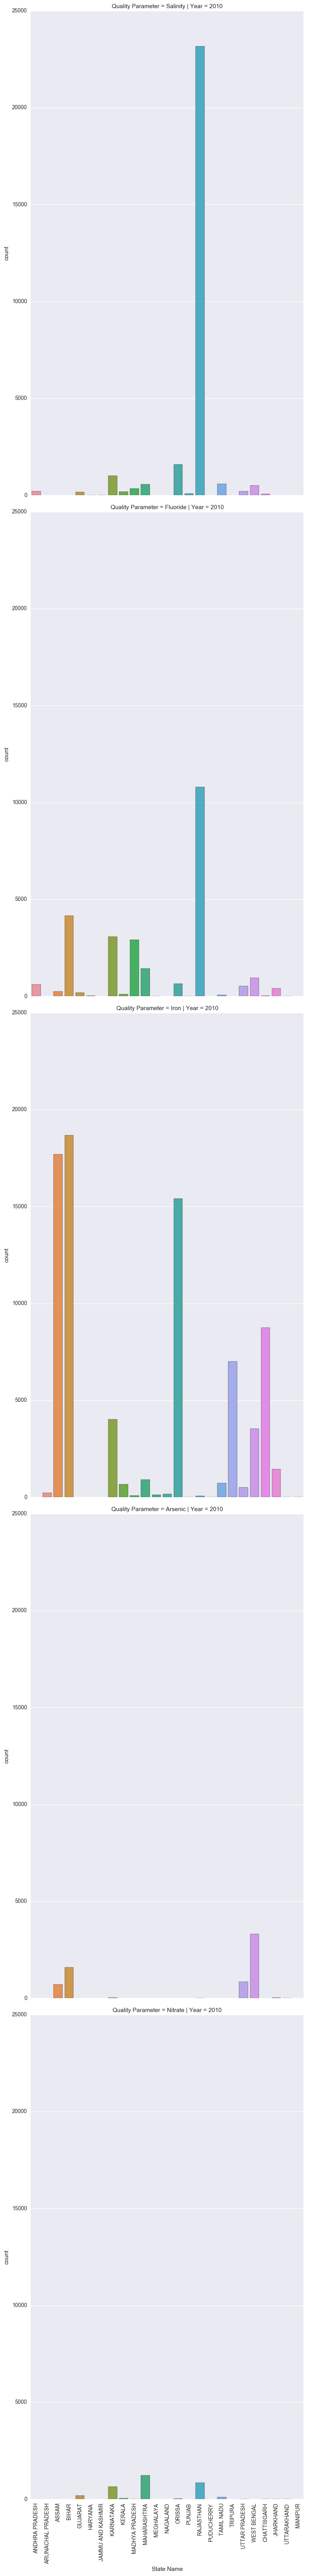

In [25]:
g = sns.factorplot("State Name", col="Year", row='Quality Parameter',
...                    data=waternew_2010,
...                    kind="count", size=13, aspect=.6)
g.set_xticklabels(rotation=90)
g.add_legend()

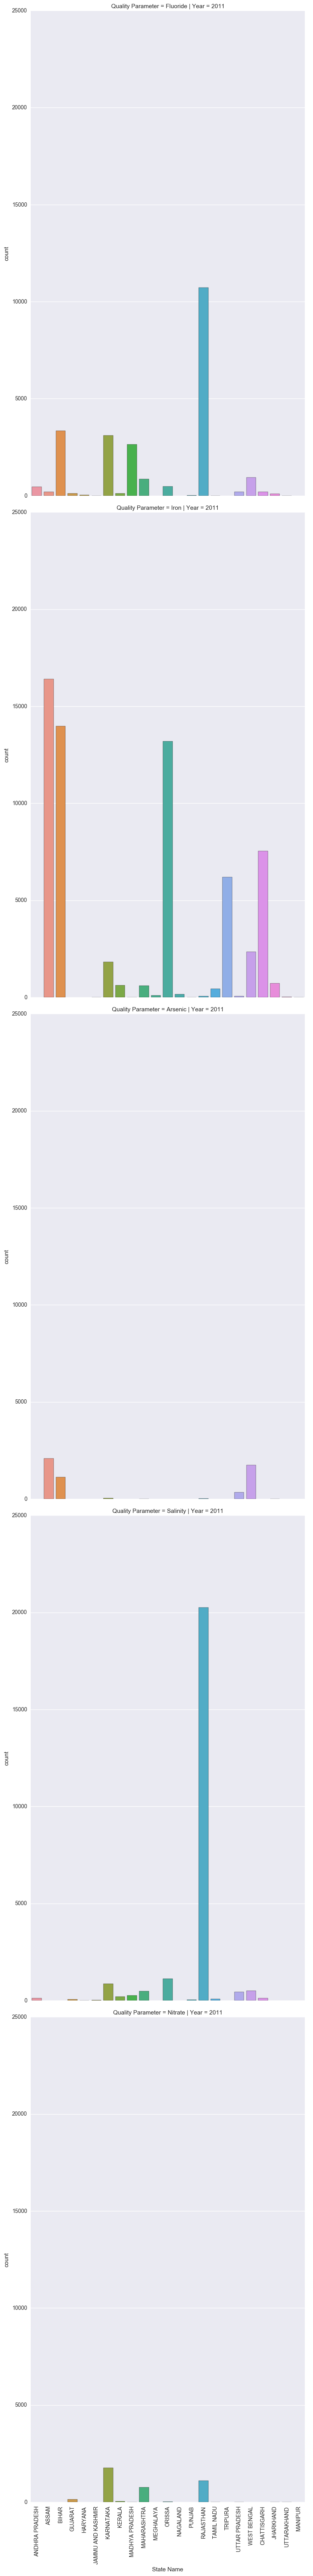

In [26]:
g = sns.factorplot("State Name", col="Year", row='Quality Parameter',
...                    data=waternew_2011,
...                    kind="count", size=13, aspect=.6)
g.set_xticklabels(rotation=90)
g.add_legend()

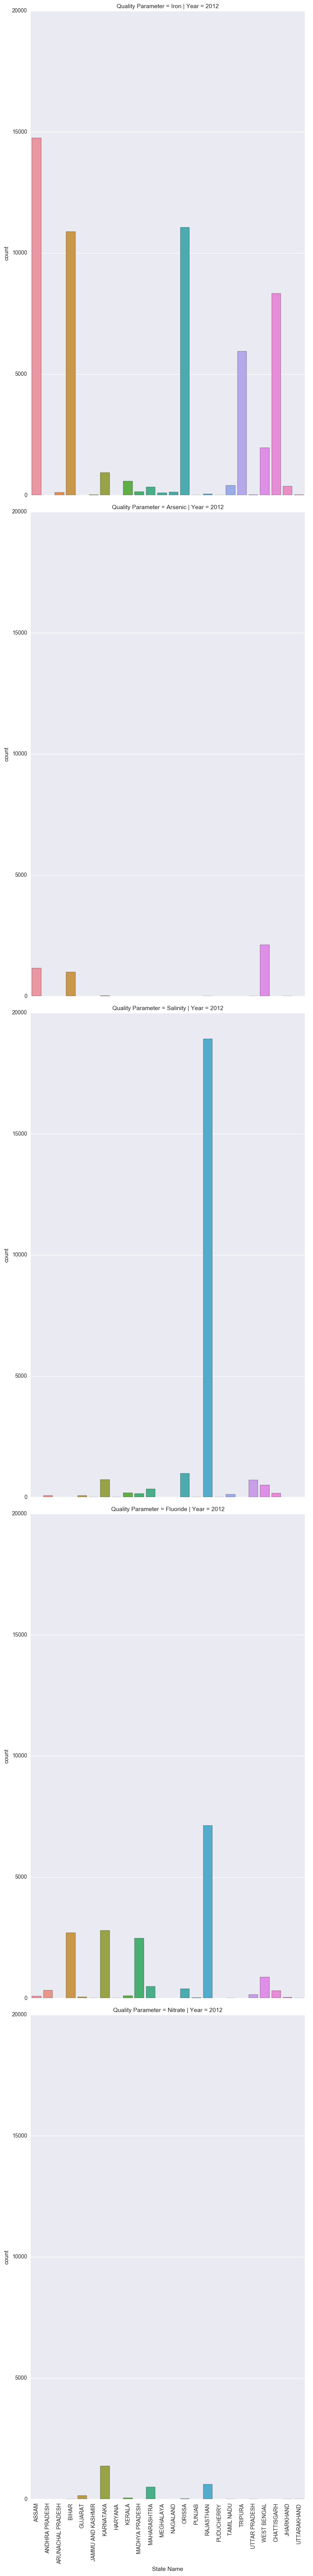

In [27]:
g = sns.factorplot("State Name", col="Year", row='Quality Parameter',
...                    data=waternew_2012,
...                    kind="count", size=13, aspect=.6)
g.set_xticklabels(rotation=90)
g.add_legend()

**The graphs below give a state wise comparison of 'Quality Parameters"**

In [120]:
waternew_bihar=waternew[waternew['State Name']=='BIHAR']
waternew_bengal=waternew[waternew['State Name']=='WEST BENGAL']
waternew_rajastan=waternew[waternew['State Name']=='RAJASTHAN']
waternew_karnataka=waternew[waternew['State Name']=='KARNATAKA']

In [121]:
waternew_karnataka.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
48007,KARNATAKA,BAGALKOT,BAGALKOT,MUGALOLLI,SANGONDI,SANGONDI,Fluoride,2009
48008,KARNATAKA,BAGALKOT,BADAMI,SULIKERI,KERAKALAMATTI,KERAKALAMATTI,Fluoride,2009
48009,KARNATAKA,BAGALKOT,BADAMI,ANAWAL,KADARAKOPPA,KADARAKOPPA,Fluoride,2009
48010,KARNATAKA,BAGALKOT,BADAMI,NEELAGUND,TIMMAPUR S.N.,TIMMAPUR SN,Fluoride,2009
48011,KARNATAKA,BAGALKOT,BADAMI,NEELAGUND,BANKANERI,BANKANERI,Fluoride,2009


In [49]:
waternew_bihar['District Name'].unique()


array(['GAYA', 'PATNA', 'NAWADA', 'NALANDA', 'BHOJPUR(AARA)', 'SARAN',
       'VAISHALI', 'SAMASTIPUR', 'DARBHANGA', 'SAHARSA', 'ROHTAS',
       'BEGUSARAI', 'AURANGABAD', 'KATIHAR', 'KISHANGANJ', 'MADHEPURA',
       'BANKA', 'JAMUI', 'KHAGARIA', 'LAKHISARAI', 'MUNGER', 'SHEIKHPURA',
       'PURNIA', 'BHAGALPUR', 'BUXAR', 'KAIMUR (BHABUA)', 'ARARIA',
       'SUPAUL'], dtype=object)

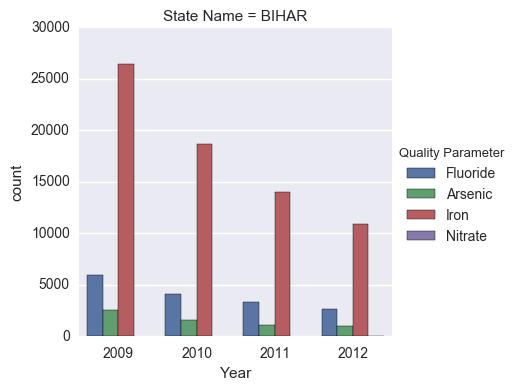

In [54]:
g=sns.factorplot('Year', col='State Name', hue='Quality Parameter', data=waternew_bihar, kind='count')

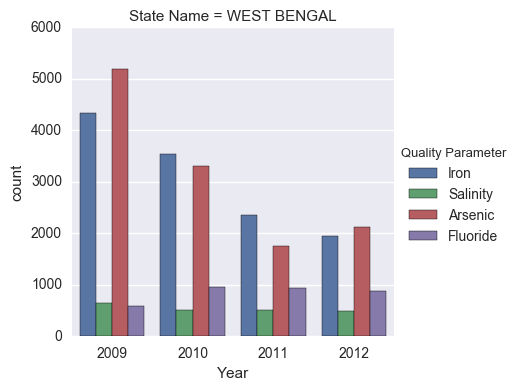

In [55]:
g=sns.factorplot('Year', col='State Name', hue='Quality Parameter', data=waternew_bengal, kind='count')

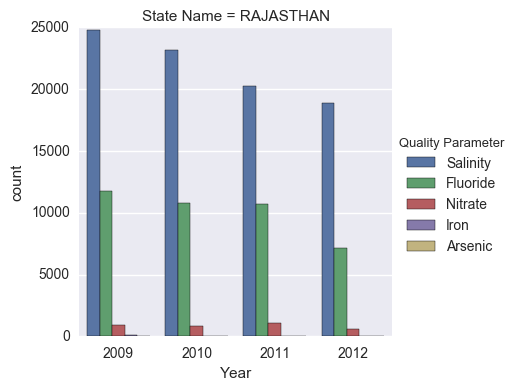

In [60]:
g=sns.factorplot('Year', col='State Name', hue='Quality Parameter', data=waternew_rajastan, kind='count')

**In Rajasthan even though salinity has decreased it atill is a problem.**

In [124]:
waternew_karnataka=waternew_karnataka.replace('KARNATAKA', 'KARNANATAK')

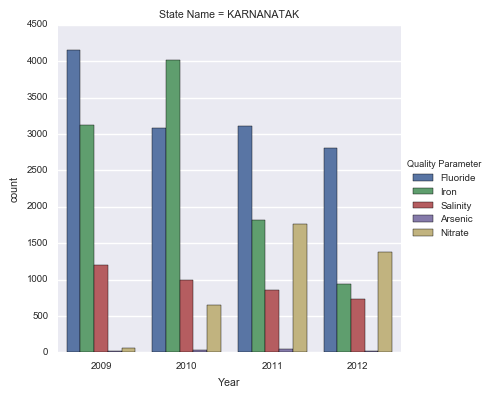

In [133]:
sns.set(font_scale=0.7)
g=sns.factorplot('Year', col='State Name', hue='Quality Parameter', data= waternew_karnataka, kind='count')

**The above graph for Karnataka is interesting in the sense that the iron quality had increase from 2010 to 2011 even though it has decreased ever since.**

**Below we assess the data at the state level for bihar, bengal, rajasthan and karnataka.**

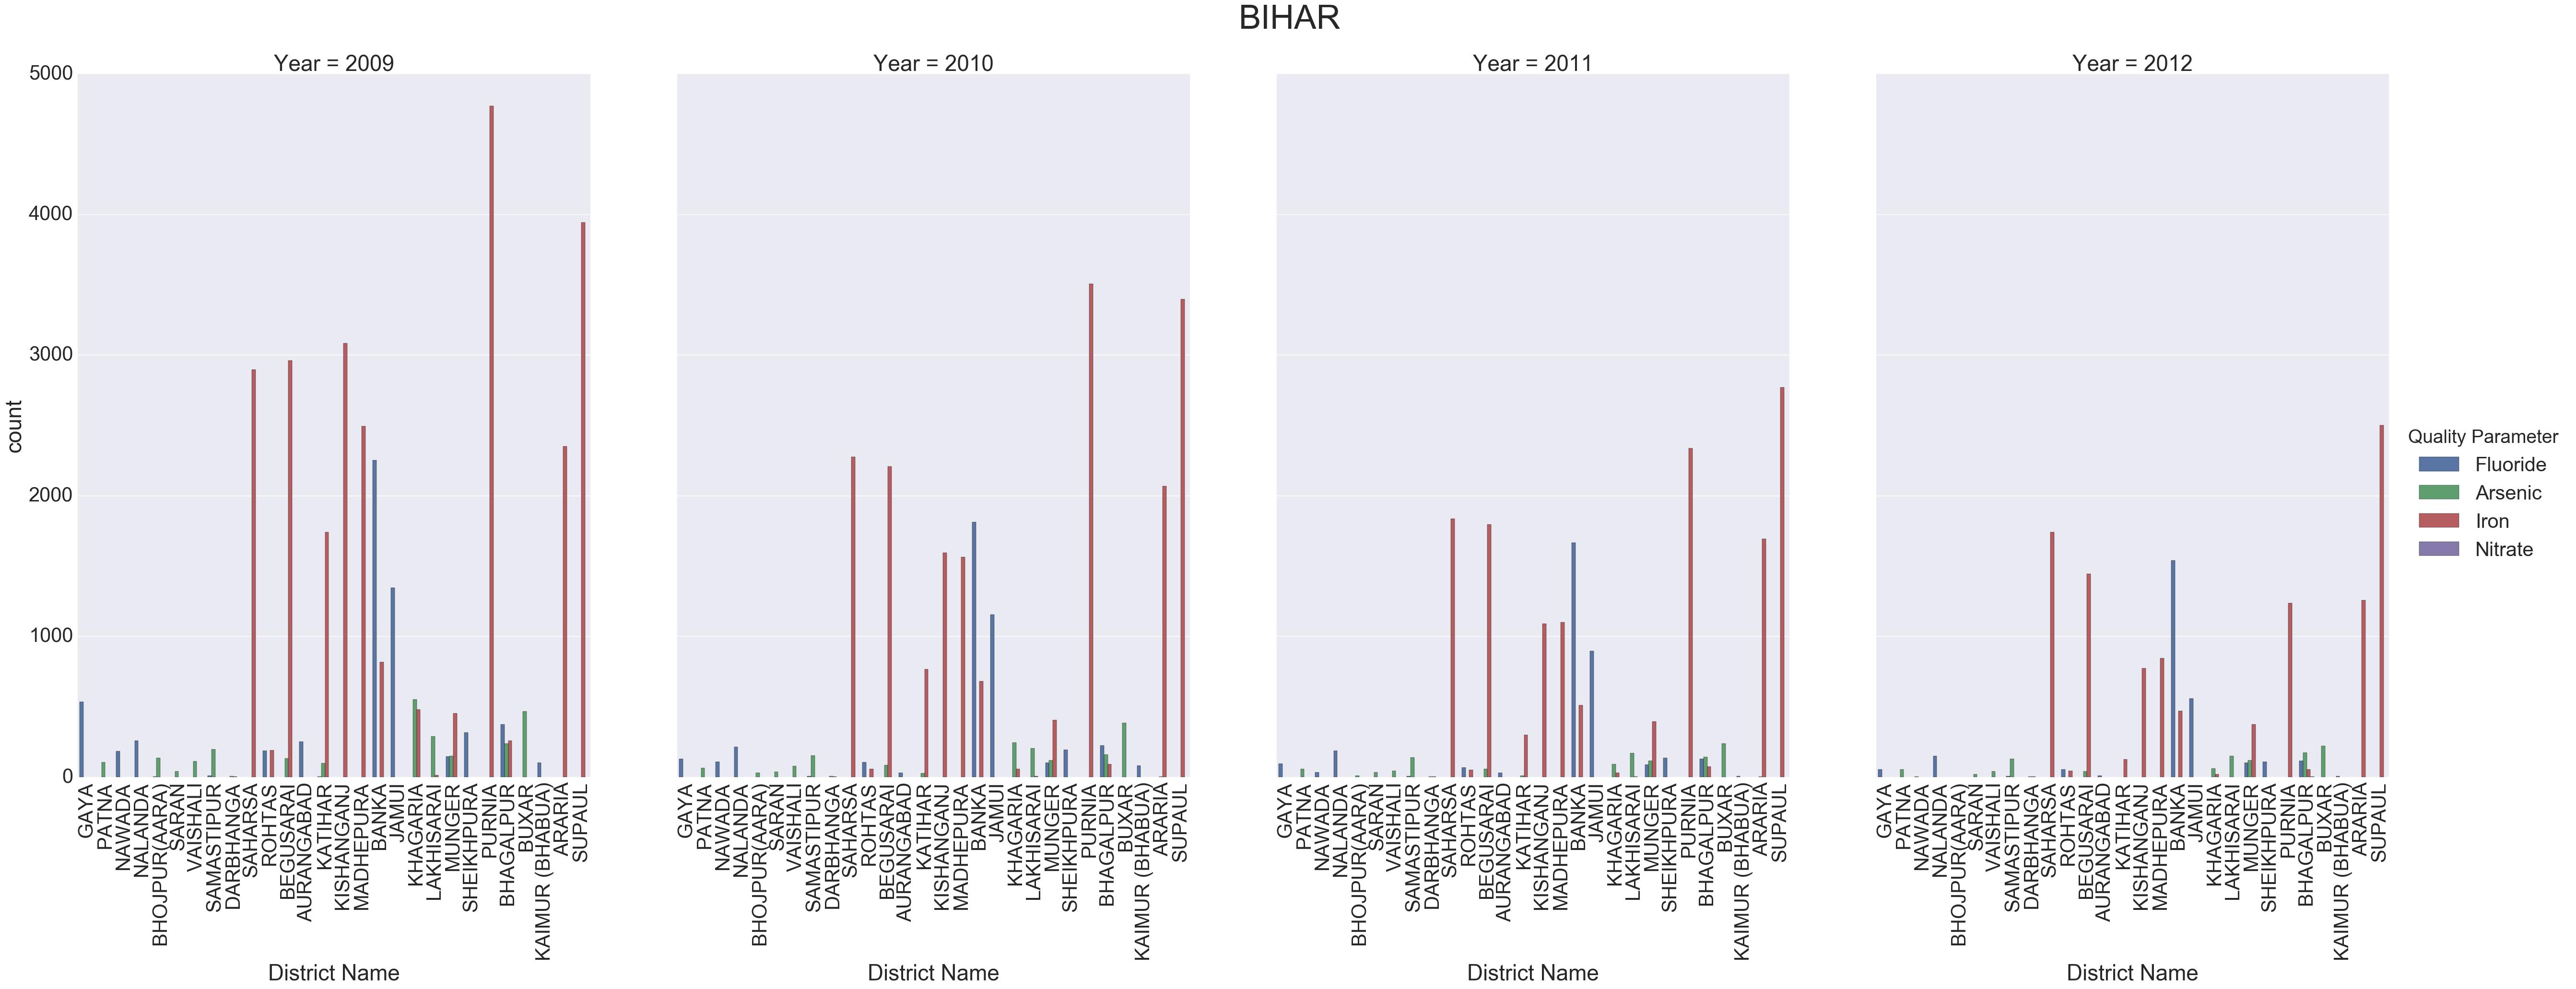

In [104]:
import matplotlib as plt

sns.mpl.rc("figure", figsize=(13,5))
g1=sns.factorplot('District Name', col='Year', hue='Quality Parameter', data=waternew_bihar, kind='count', size=18,aspect=.7, col_wrap=4)
sns.set(font_scale=3)
g1.set_xticklabels(rotation=90)
g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle('BIHAR', fontsize=50)


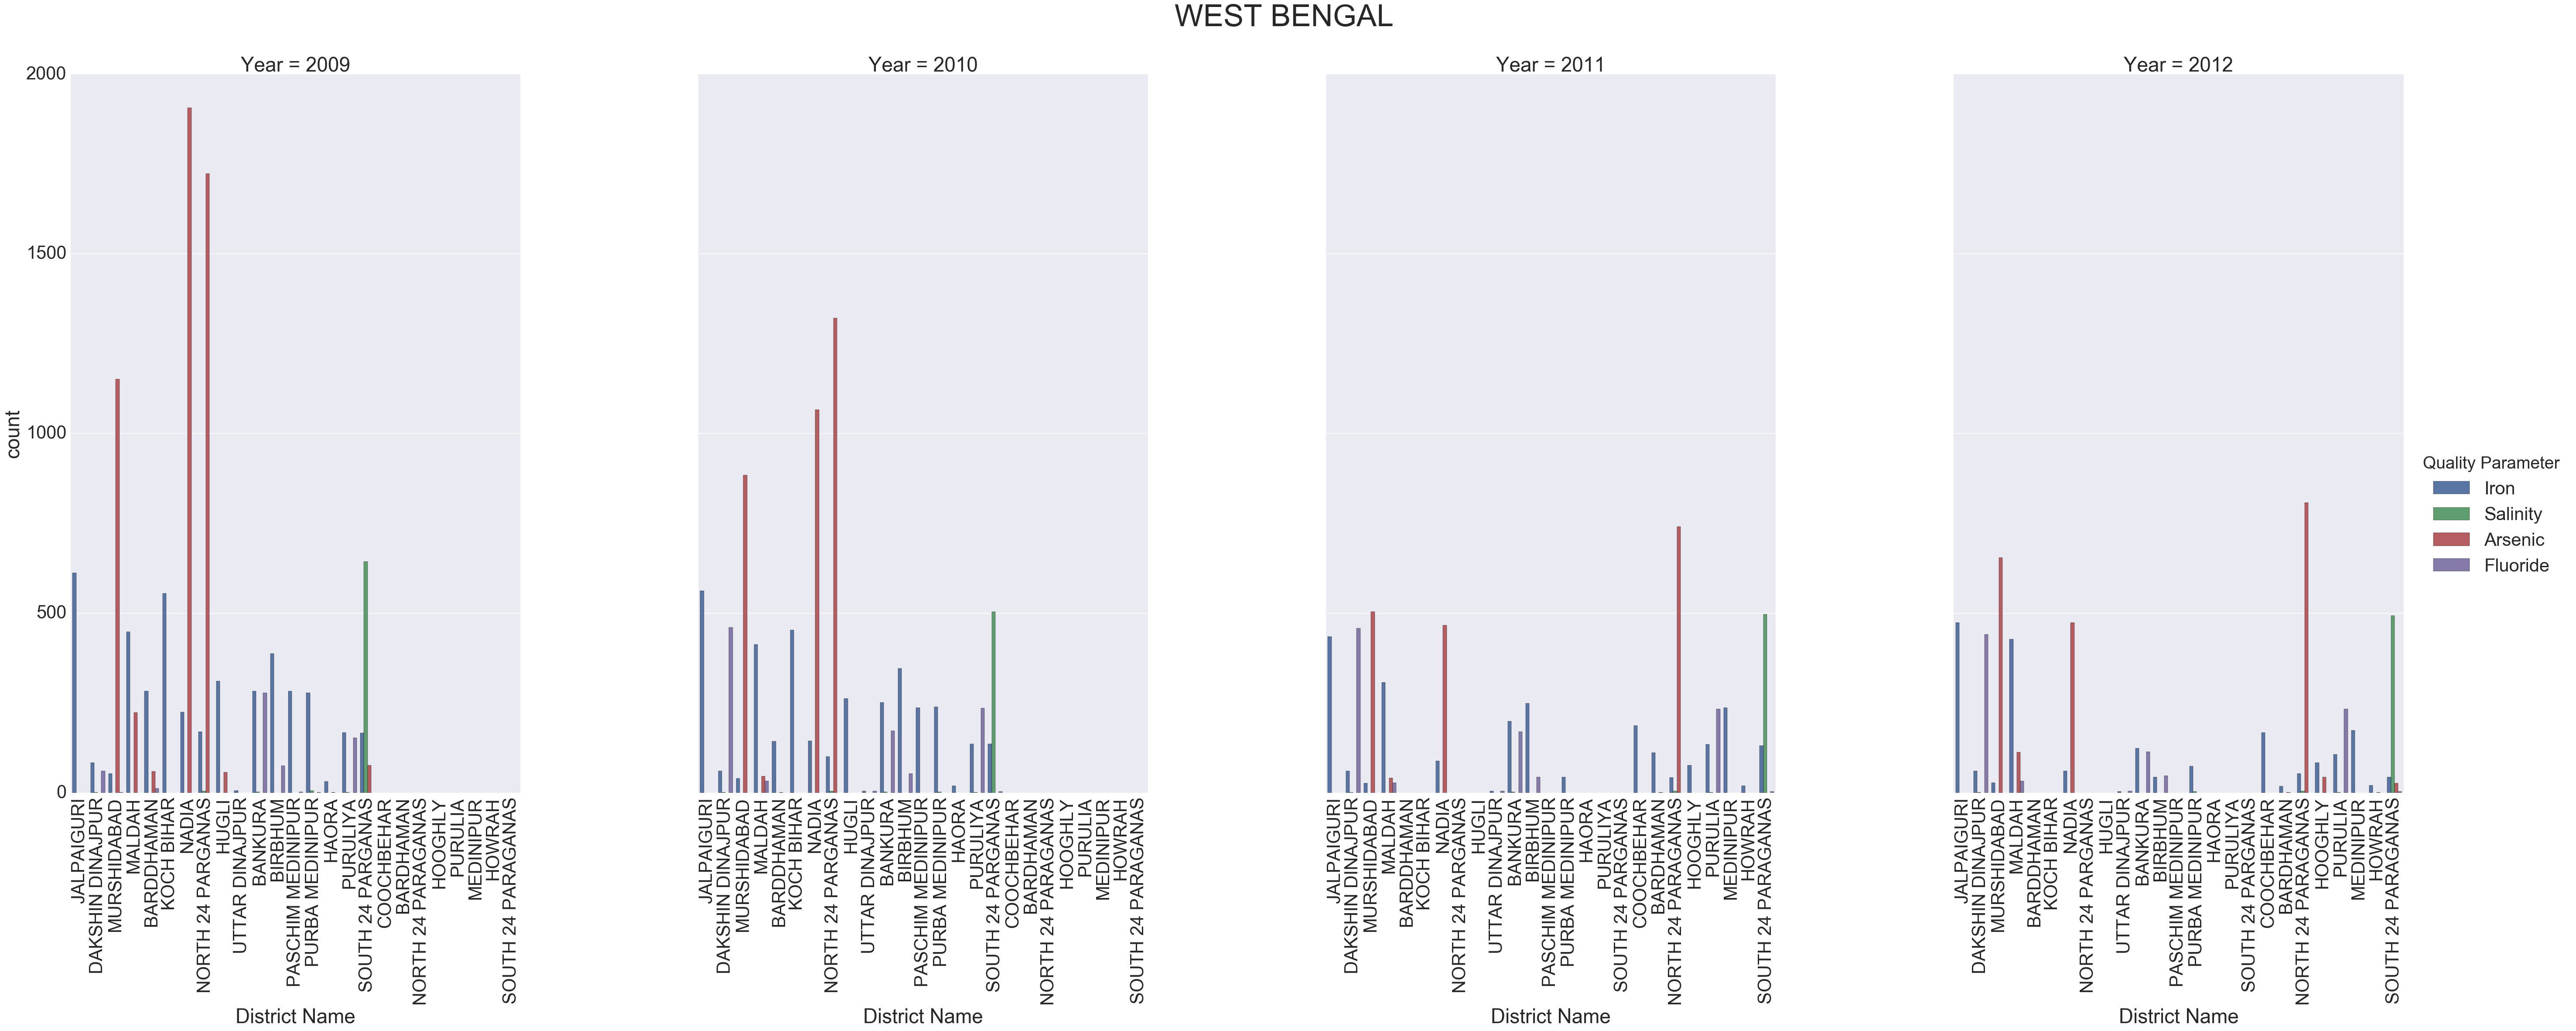

In [107]:
import matplotlib as plt

sns.mpl.rc("figure", figsize=(19,5))
g2=sns.factorplot('District Name', col='Year', hue='Quality Parameter', data=waternew_bengal, kind='count', size=20,aspect=.7, col_wrap=4)
sns.set(font_scale=3)
g2.set_xticklabels(rotation=90)
g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle('WEST BENGAL', fontsize=50)

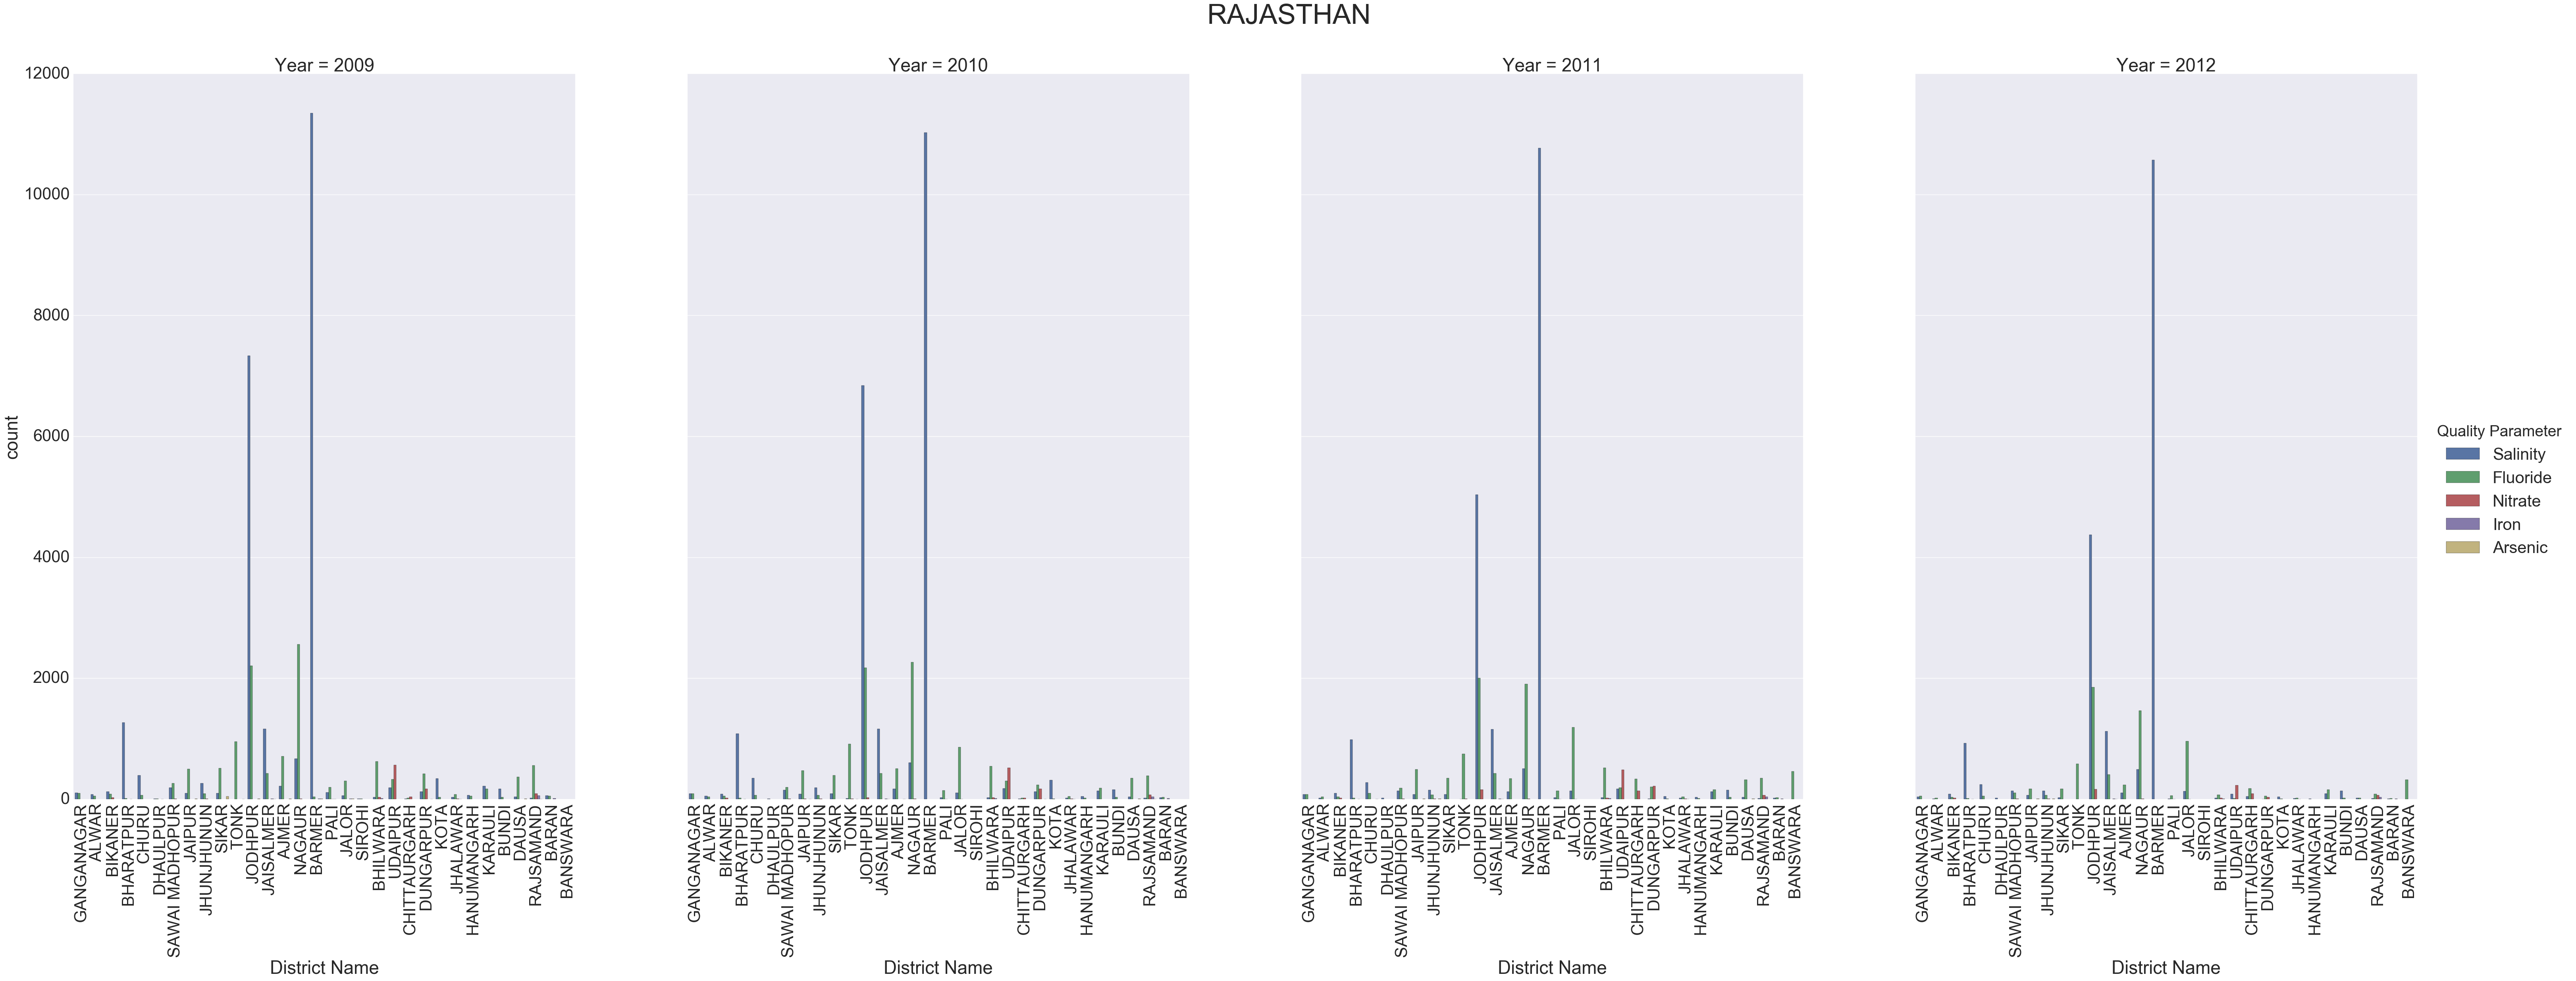

In [110]:
sns.mpl.rc("figure", figsize=(19,5))
g4=sns.factorplot('District Name', col='Year', hue='Quality Parameter', data=waternew_rajastan, kind='count', size=22,aspect=.7, col_wrap=4)
sns.set(font_scale=3)
g4.set_xticklabels(rotation=90)
g4.fig.subplots_adjust(top=0.9)
g4.fig.suptitle('RAJASTHAN', fontsize=50)
sns.mpl.rc("figure", figsize=(19,5))

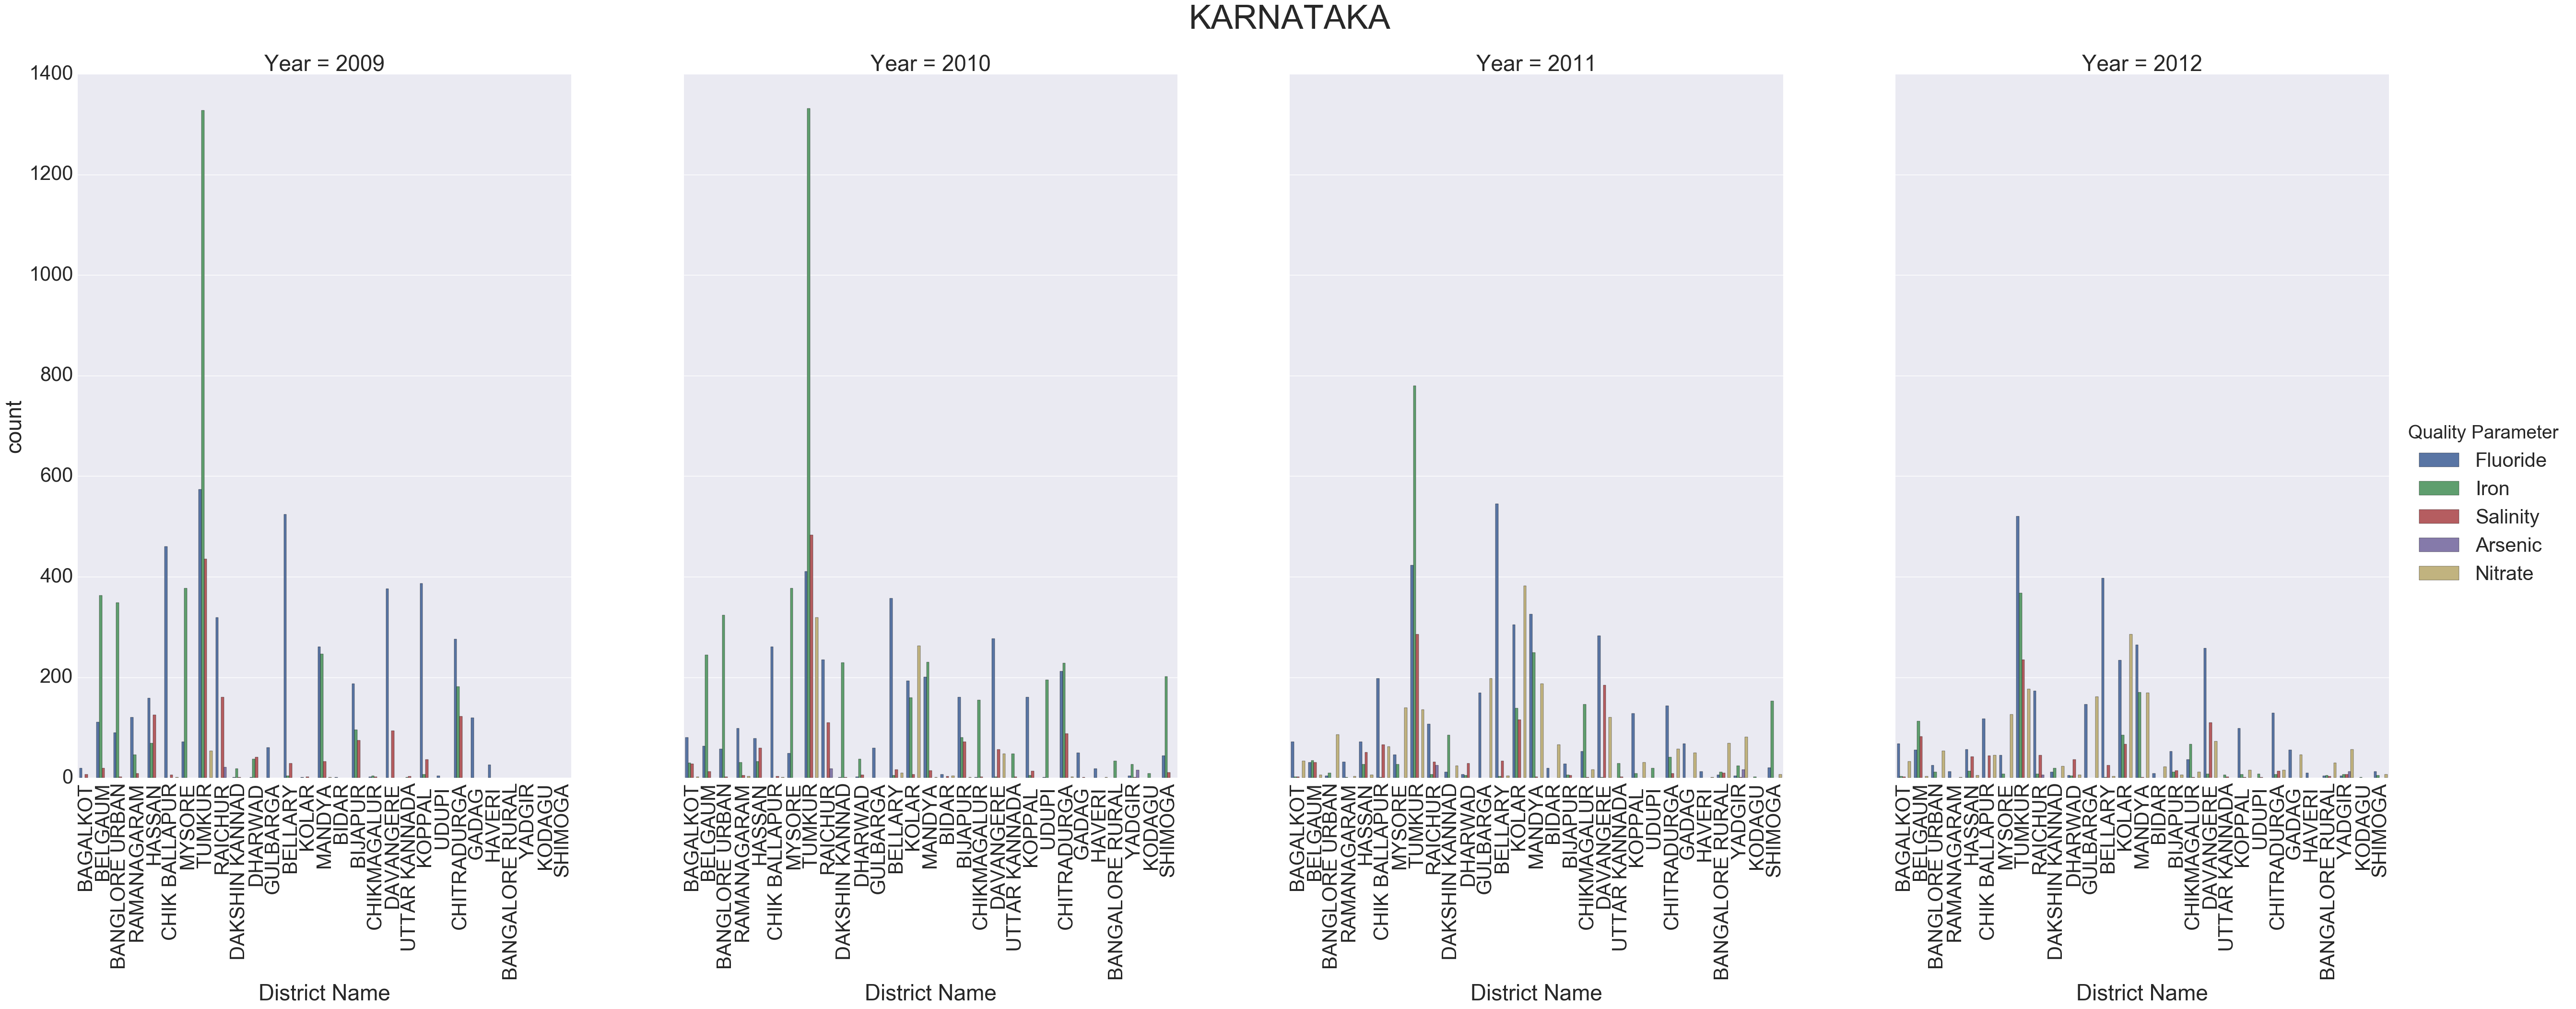

In [135]:
sns.mpl.rc("figure", figsize=(13,5))
g1=sns.factorplot('District Name', col='Year', hue='Quality Parameter', data=waternew_karnataka, kind='count', size=18,aspect=.7, col_wrap=4)
sns.set(font_scale=3)
g1.set_xticklabels(rotation=90)
g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle('KARNATAKA', fontsize=50)

**Overall we see that water quality is improving but in some cases more have to be done in order to achieve more improvement.**